<a href="https://colab.research.google.com/github/marquinhosmar/DataScience---MVP-Machine-Learning-Analytics/blob/main/Projeto_MVP_ML_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Nome:** Marcos Correia Araujo

**Matr√≠cula:** 4052025000145

**Dataset:** [Siconfi](https://apidatalake.tesouro.gov.br/ords/siconfi/tt/dca)

**---OBSERVA√á√ïES IMPORTANTES---**
O dataset do SICONFI (Sistema de Informa√ß√µes Cont√°beis e Fiscais do Setor P√∫blico Brasileiro) √© uma plataforma do Tesouro Nacional que recebe, processa e divulga informa√ß√µes cont√°beis, financeiras e estat√≠sticas de todos os entes federativos. √â uma ferramenta essencial para a transpar√™ncia e o acompanhamento da gest√£o fiscal do pa√≠s.


##Descri√ß√£o do Problema

O conjunto de dados do Siconfi √© um conjunto de dados multivariado que consiste em medidas que permitem analisar v√°rias situa√ß√µes financeiras dos estados e municipios brasieliros, tais como: evolu√ß√£o da **`Receita`** e **`Despesa P√∫blica`**, capacidade de **`Investimento`**, situa√ß√£o da responsabilidade fiscal, dep√™ncia de transfer√™ncias de outros entes, comparativos entre regi√µes, qualidade do gasto p√∫blico, entre outros.

O `investimento p√∫blico` √© universalmente reconhecido como um pilar para o desenvolvimento econ√¥mico e social. Por meio da forma√ß√£o de capital em infraestrutura, educa√ß√£o, sa√∫de, e outras areas de interesse p√∫blico, ele n√£o apenas estimula a atividade econ√¥mica no curto prazo, mas tamb√©m eleva a produtividade e a competitividade no longo prazo, sendo um instrumento essencial para a redu√ß√£o das desigualdades.

Em um pa√≠s de dimens√µes continentais e com profundas disparidades regionais como o Brasil, a aloca√ß√£o de investimentos pelos governos municipais assume um papel ainda mais cr√≠tico, sendo fundamental para promover a converg√™ncia de renda e garantir o acesso equitativo a servi√ßos p√∫blicos de qualidade.

O presente trabalho tem como objetivos principais analisar os investimentos p√∫blicos dos entes municipais do Estado do Cear√° durante o per√≠odo de 2019 a 2024. Bem como a rela√ß√£o `investimento` sobre a `despesa total`, e o `investimento per capta` por habitante.

Inicialmente o objetivo inicial era analisar todos os munic√≠pios do Brasil no intervalo citado anteriormente. Devido a grande quantidade de informa√ß√µes e a demora para baixar os dados, optou-se por restringir aos mun√≠pios do Estado do Cear√° que √© o local onde o autor deste trabalho reside.

O **`investimento p√∫blico`** √© uma **`despesa de capital`**. Inclu√≠ obras p√∫blicas (escolas, hospitais, estradas), compra de equipamentos e im√≥veis permanentes. Seu objetivo √© o desenvolvimento econ√¥mico e social (infraestrutura, servi√ßos, gera√ß√£o de ativos).

## Hip√≥teses do Problema

Restrigindo a amostra aos municip√≠os do estado do Cear√°, as hip√≥teses que tracei s√£o as seguintes:

- O **`Investimento P√∫blico`** segue um padr√£o uniforme durante um determinado per√≠odo de tempo ou apresenta varia√ß√µes?

- Avaliar se a maior **`Receita Total`** ou maior **`Despesa Total`** est√° associada a maior capacidade de **`Investimento`** per capta.

-  Munic√≠pios com maiores gastos brutos s√£o os que mais realizam investimentos em termos percentuais?

- √â poss√≠vel `classificar` a `sa√∫de financeira` de um munic√≠pio com base em `indicadores demogr√°ficos` e `indicadores financeiros` relacionados ao `Investimento P√∫blico`?



## Tipo de Problema


Este √© um problema de **`Classifica√ß√£o Supervisionada`**. Dado um conjunto de caracter√≠sticas como `Despesa Total`, `Depesa Corrente`, `Receita Total`, `Investimento`, `Popula√ß√£o`, etc, o objetivo √© classificar se um munic√≠pio est√° em com dificuldades or√ßament√°rias com base em seus indicadores de investimento p√∫blico. Bem como a partir desses mesmos indicadores descobrir  ind√≠cios de Sa√∫de Fiscal.

## Sele√ß√£o de Dados

O dataset do **`siconfi`** √© um conjunto de dados de dom√≠nio p√∫blico, amplamente dispon√≠vel e frequentemente inclu√≠do em bibliotecas de aprendizado de m√°quina. √â  utilizado para diversas finalidades de pesquisas econ√¥micas, bem como no meio acad√™mico. √â necess√°ria uma etapa de sele√ß√£o de dados externa, pois o dataset  possui muitos dados e de acordo com a finalidade √© importante definir o que ser√° filtrado.

O dataset poderia ser carregado diretamente da **`API`** do **`Tesouro Nacional`**, por√©m para acelerar o processo de importa√ß√£o de dados e garantir que o dataset possa ser importado diretamente do github atrav√©s de um arquivo csv foi feito os seguintes passos at√© obter um dataset pronto para importa√ß√£o:

**1**. Inicialmente foi rodado esse c√≥digo abaixo em outro notebook do colab definindo a coleta:
```
import pandas as pd
import requests

# --- Passo 1: Obter a lista de Munic√≠pios do IBGE ---
url_municipios = "https://servicodados.ibge.gov.br/api/v1/localidades/municipios"

try:
    print("Buscando lista de munic√≠pios do IBGE...")
    response_ibge = requests.get(url_municipios)
    response_ibge.raise_for_status()

    dados_ibge = response_ibge.json()

    municipios_df = pd.DataFrame(dados_ibge)
    municipios_df['id_ente'] = municipios_df['id'].astype(str)
    municipios_df = municipios_df[['id_ente', 'nome', 'microrregiao']]

    municipios_df['sigla_uf'] = municipios_df['microrregiao'].apply(
        lambda x: x['mesorregiao']['UF']['sigla'] if x is not None else None
    )
    municipios_df = municipios_df.drop(columns=['microrregiao'])

    # Remove as linhas onde a sigla da UF √© nula
    municipios_df = municipios_df.dropna(subset=['sigla_uf'])

    print(f"Lista de {len(municipios_df)} munic√≠pios obtida com sucesso.")

except requests.exceptions.RequestException as e:
    print(f"Erro ao buscar a lista de munic√≠pios do IBGE: {e}")
    municipios_df = pd.DataFrame()
    
# --- Passo 2: Filtrar apenas os munic√≠pios do Cear√° (CE) ---
municipios_ce = municipios_df[municipios_df['sigla_uf'] == 'CE']
print(f"Filtrando: {len(municipios_ce)} munic√≠pios do Cear√° (CE) encontrados.")

```









**O que o c√≥digo acima executa:**

*   Importa as biliotecas *pandas* e *requests*  
*   Obt√©m a lista de munic√≠pios atrav√©s da api do IBGE;
*   Filtra dentro da lista apenas os mun√≠pios do Estado do Cear√°;



```
#Iterar sobre os munic√≠pios e buscar dados na API do SICONFI ---#

exercicio = range(2019, 2024)  # Intervalo de 5 anos: 2019, 2020, 2021, 2022, 2023
resultados_lista = []

if not municipios_ce.empty:
    for index, row in municipios_ce.iterrows():
        municipio_codigo = row['id_ente']
        municipio_nome = row['nome']

        for ano in exercicio:
            url_base = "https://apidatalake.tesouro.gov.br/ords/siconfi/tt/dca"
            params = {'an_exercicio': ano, 'id_ente': municipio_codigo}

            try:
                response = requests.get(url_base, params=params)
                status = response.status_code
                print(f"Status: {status} para {municipio_nome} ({municipio_codigo}) no ano {ano}")

                if status == 200:
                    dados = response.json()
                    items_list = dados.get('items', [])

                    if not items_list:
                        print(f"  -> Aviso: Nenhum item retornado para {municipio_nome} em {ano}.")
                        continue

                    items = pd.DataFrame(items_list)

                    items['Munic√≠pio'] = municipio_nome
                    items['Codigo_Municipio'] = municipio_codigo
                    items['Ano'] = ano

                    items['valor'] = pd.to_numeric(items['valor'], errors='coerce')

                    resultados_lista.append(items)

                else:
                    print(f"  -> Erro na requisi√ß√£o para {municipio_nome} ({municipio_codigo}) em {ano}. Status: {status}")
                    continue

            except requests.exceptions.RequestException as e:
                print(f"  -> Erro de conex√£o para {municipio_nome} em {ano}: {e}")
                continue

```


**O que o c√≥digo acima executa:**


*   Itera sobre os munic√≠pios e busca os dados na API do SICONFI;
*   Estabelece o intervalo de 5 anos (de 2019 a 2013);



```

Passo 4: Juntar os resultados ---
if resultados_lista:
    resultados_brutos = pd.concat(resultados_lista, ignore_index=True)
    print("\nDados consolidados em um DataFrame final.")
    print(resultados_brutos.head())
else:
    print("\nNenhum dado foi coletado. O DataFrame final est√° vazio.")
    resultados_brutos = pd.DataFrame

```

O que o c√≥digo acima executa:



*   Junta os resultados em um dataframe final;
*   nome do dataframe = DataFrame



```

# --- Passo 5: Exportar o DataFrame para um arquivo CSV ---
if not resultados_brutos.empty:
    nome_arquivo = "dados_siconfi_ceara_2019-2023.csv"
    resultados_brutos.to_csv(nome_arquivo, index=False, encoding='utf-8-sig')
    print(f"\nDados exportados com sucesso para o arquivo: {nome_arquivo}")
else:
    print("\nNenhum dado para exportar. O DataFrame est√° vazio.")

```

O que o c√≥digo acima executa:

*   Gera um arquivo *.csv* chamado "dados_siconfi_ceara_2019-2023.csv";
*   √â feito o dowload do arquivo para posterior upload no *`github`*;
*   O tempo de execu√ß√£o baixando o dataframe diretamente da API do tesouro demora aproximadamente 10 minutos, com este procedimento o tempo de execu√ß√£o fica menor que 10 segundos;






O referido DataFrame √© carregado para o github, de onde estar pronto para ser importado e iniciar o processo de an√°lise:

```
url = "https://media.githubusercontent.com/media/marquinhosmar/datascience-mvp/refs/heads/master/dados_siconfi_ceara_2019-2023.csv"

```

# Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset `dados_siconfi_ceara_2019-2023.csv` que estar alocado no github.

In [97]:
# Setup b√°sico e reprodutibilidade
# Importa√ß√£o das bibliotecas

import os, random, time, sys, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score



SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks que suportam seed adicional (ex.: PyTorch/TensorFlow), documente aqui:
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


In [98]:
# Instala√ß√£o de pacotes extras
!pip install ipeadatapy
import ipeadatapy as ip
import ipeadatapy

In [99]:
# Importa√ß√£o do dataset e guarda em um dataframe chamado df

url = "https://media.githubusercontent.com/media/marquinhosmar/datascience-mvp/refs/heads/master/dados_siconfi_ceara_2019-2023.csv"
df = pd.read_csv(url)



In [100]:
# Confirmando que o objeto df √© um DataFrame do Pandas:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# An√°lise de Dados

Nesta etapa de An√°lise de Dados Explorat√≥ria (EDA) sobre o dataset do Siconfi, visamos entender a distribui√ß√£o, as rela√ß√µes e as caracter√≠sticas das vari√°veis, o que √© crucial para as etapas subsequentes de pr√©-processamento e modelagem.

## Total e Tipo das Inst√¢ncias

O dataset `df` possui 942.530 inst√¢ncias (observa√ß√µes), e 14 colunas. As caracter√≠sticas de medi√ß√£o s√£o do tipo`float64` (ou ponto flutuante de 64 bits) √© um tipo num√©rico usado para representar n√∫meros decimais (com casas ap√≥s a v√≠rgula). Temos tamb√©m o `int64` (ou inteiro de 64 bits) que √© um tipo num√©rico usado para representar n√∫meros inteiros (sem casas decimais). E por fim o tipo `object` que √© um tipo de dados mais gen√©rico, geralmente ele √© usado para armazenar texto (strings).
N√£o existe valores nulos e nem dados faltantes.

In [101]:
# Total de inst√¢ncias
# Tipos de dados por coluna
print(f"Total de inst√¢ncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de inst√¢ncias: 942530

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942530 entries, 0 to 942529
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   exercicio         942530 non-null  int64  
 1   instituicao       942530 non-null  object 
 2   cod_ibge          942530 non-null  int64  
 3   uf                942530 non-null  object 
 4   anexo             942530 non-null  object 
 5   rotulo            942530 non-null  object 
 6   coluna            942530 non-null  object 
 7   cod_conta         942530 non-null  object 
 8   conta             942530 non-null  object 
 9   valor             942530 non-null  float64
 10  populacao         942530 non-null  int64  
 11  Munic√≠pio         942530 non-null  object 
 12  Codigo_Municipio  942530 non-null  int64  
 13  Ano               942530 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 100.7+ MB

In [102]:
# Primeiras 5 linhas
df.head()

exercicio                           instituicao  cod_ibge  uf  \
0       2019  Prefeitura Municipal de Abaiara - CE   2300101  CE   
1       2019  Prefeitura Municipal de Abaiara - CE   2300101  CE   
2       2019  Prefeitura Municipal de Abaiara - CE   2300101  CE   
3       2019  Prefeitura Municipal de Abaiara - CE   2300101  CE   
4       2019  Prefeitura Municipal de Abaiara - CE   2300101  CE   

            anexo  rotulo      coluna         cod_conta  \
0  DCA-Anexo I-AB  Padr√£o  31/12/2019  P1.0.0.0.0.00.00   
1  DCA-Anexo I-AB  Padr√£o  31/12/2019  P1.1.0.0.0.00.00   
2  DCA-Anexo I-AB  Padr√£o  31/12/2019  P1.1.1.0.0.00.00   
3  DCA-Anexo I-AB  Padr√£o  31/12/2019  P1.1.1.1.0.00.00   
4  DCA-Anexo I-AB  Padr√£o  31/12/2019  P1.1.1.1.1.00.00   

                                               conta         valor  populacao  \
0                            1.0.0.0.0.00.00 - Ativo 29,758,252.47      11663   
1                 1.1.0.0.0.00.00 - Ativo Circulante  4,098,827.82      11663   
2    1.1.1.0.0.00.00 - Caixa e Equivalentes de Caixa  2,782,629.25      11663   
3  1.1.1.1.0.00.00 - Caixa e Equivalentes de Caix...  2,782,629.25      11663   
4  1.1.1.1.1.00.00 - Caixa e Equivalentes de Caix...  2,782,629.25      11663   

  Munic√≠pio  Codigo_Municipio   Ano  
0   Abaiara           2300101  2019  
1   Abaiara           2300101  2019  
2   Abaiara           2300101  2019  
3   Abaiara           2300101  2019  
4   Abaiara           2300101  2019

In [103]:
# √öltimas 5 linhas
print(df.tail())

        exercicio                                   instituicao  cod_ibge  uf  \
942525       2023  Prefeitura Municipal de Vi√ßosa do Cear√° - CE   2314102  CE   
942526       2023  Prefeitura Municipal de Vi√ßosa do Cear√° - CE   2314102  CE   
942527       2023  Prefeitura Municipal de Vi√ßosa do Cear√° - CE   2314102  CE   
942528       2023  Prefeitura Municipal de Vi√ßosa do Cear√° - CE   2314102  CE   
942529       2023  Prefeitura Municipal de Vi√ßosa do Cear√° - CE   2314102  CE   

                 anexo  rotulo      coluna                      cod_conta  \
942525  DCA-Anexo I-HI  Padr√£o  31/12/2023               P4.9.9.6.0.00.00   
942526  DCA-Anexo I-HI  Padr√£o  31/12/2023               P4.9.9.6.1.00.00   
942527  DCA-Anexo I-HI  Padr√£o  31/12/2023               P4.9.9.9.0.00.00   
942528  DCA-Anexo I-HI  Padr√£o  31/12/2023               P4.9.9.9.1.00.00   
942529  DCA-Anexo I-HI  Padr√£o  31/12/2023  ResultadoPatrimonialDoPeriodo   

                                   

In [104]:
# Verificando a quantidade de valores nulos por coluna
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
exercicio           0
instituicao         0
cod_ibge            0
uf                  0
anexo               0
rotulo              0
coluna              0
cod_conta           0
conta               0
valor               0
populacao           0
Munic√≠pio           0
Codigo_Municipio    0
Ano                 0
dtype: int64


In [105]:
# Quantas linhas t√™m ao menos um valor vazio
df.isnull().any(axis=1).sum()

np.int64(0)

## Atributos do Dataset

O dataset `df` cont√©m 942.530 inst√¢ncias com 14 colunas:

- ***exercicio*** : o ano em que os fatos cont√°beis ocorreram e foram registrados.
- ***instituicao*** : descri√ß√£o do nome do Munic√≠pio.
- ***cod_ibge*** : c√≥digo do estado segundo a classifica√ß√£o do IBGE.
- ***uf*** : sigla do estado de localiza√ß√£o dos Munic√≠pios.
- ***anexo*** :  indica em qual anexo dos demonstrativos cont√°beis ou fiscais aquela conta aparece ou deve ser demonstrada, conforme exig√™ncias da contabilidade p√∫blica brasileira.
- ***rotulo*** : √© o nome oficial e padronizado da conta cont√°bil, definido pela autoridade competente (como o Tesouro Nacional no caso do PCASP).
- ***coluna*** : dia, m√™s e ano (coincide com o exerc√≠cio).
- ***cod_conta*** : n√∫mero da conta do plano de contas.
- ***conta*** : nome da conta.
- ***valor*** : representa o montante financeiro associado √†quela conta cont√°bil.
- ***populacao*** : popula√ß√£o do munic√≠pio.
- ***Munic√≠pio*** : repete novamente o munic√≠pio do estado.
- ***C√≥digo_Municipio*** : c√≥digo IBGE do munic√≠pio.
- ***Ano*** : coincide com o ano de exerc√≠cio.

#Tratamento dos dados

Baseado no foco do problema a ser analisado e nas hip√≥teses que precisam ser respondidas, ser√° feito alguns comandos e ajustes para enxugar e tratar os dados dispon√≠veis no DataFrame `df`:

In [106]:
# Garante que a coluna 'valor' seja num√©rica
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Remove linhas sem valor num√©rico
df = df.dropna(subset=['valor'])

# Fun√ß√£o para aplicar os padr√µes de contas por ano
def get_padroes_conta(ano):
    if ano <= 2017:
        return {
            'corrente': "3.0.00.00.00.00 - Despesas Correntes",
            'capital': "4.0.00.00.00.00 - Despesas de Capital",
            'rc': "1.0.0.0.00.00.00 - Receitas Correntes",
            'rk': "2.0.0.0.00.00.00 - Receitas de Capital",
            'rc_intra': "7.0.0.0.00.00.00 - Receitas Correntes",
            'rk_intra': "8.0.0.0.00.00.00 - Receitas de Capital",
            'investimento': "4.4.00.00.00.00 - Investimentos"
        }
    else:
        return {
            'corrente': "3.0.00.00.00 - Despesas Correntes",
            'capital': "4.0.00.00.00 - Despesas de Capital",
            'rc': "1.0.0.0.00.0.0 - Receitas Correntes",
            'rk': "2.0.0.0.00.0.0 - Receitas de Capital",
            'rc_intra': "7.0.0.0.00.0.0 - Receitas Correntes",
            'rk_intra': "8.0.0.0.00.0.0 - Receitas de Capital",
            'investimento': "4.4.00.00.00 - Investimentos"
        }

# Lista para armazenar os resultados
resumo_lista = []

# Loop para resumir os dados, agora incluindo a popula√ß√£o e UF
# A GRUPAMENTO AGORA INCLUI A POPULA√á√ÉO E UF
for (municipio, cod_municipio, ano, populacao, uf), grupo in df.groupby(['Munic√≠pio', 'Codigo_Municipio', 'Ano', 'populacao', 'uf']):
    padroes = get_padroes_conta(ano)

    # Filtragens
    despesas_correntes = grupo[
        grupo['conta'].str.contains(padroes['corrente'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]
    despesas_capital = grupo[
        grupo['conta'].str.contains(padroes['capital'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]

    receitas_correntes = grupo[
        grupo['conta'].str.contains(padroes['rc'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_capital = grupo[
        grupo['conta'].str.contains(padroes['rk'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_correntes_IN = grupo[
        grupo['conta'].str.contains(padroes['rc_intra'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_capital_IN = grupo[
        grupo['conta'].str.contains(padroes['rk_intra'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    investimentos = grupo[
        grupo['conta'].str.contains(padroes['investimento'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]

    # C√°lculos
    exc = receitas_correntes['valor'].sum() + receitas_capital['valor'].sum()
    intra = receitas_correntes_IN['valor'].sum() + receitas_capital_IN['valor'].sum()
    total_receita = exc + intra
    total_despesa = despesas_correntes['valor'].sum() + despesas_capital['valor'].sum()
    total_investimento = investimentos['valor'].sum()

    # Adiciona √† lista
    # POPULA√á√ÉO E UF ADICIONADAS AQUI
    resumo_lista.append({
        "Munic√≠pio": municipio,
        "Codigo_Municipio": cod_municipio,
        "Ano": ano,
        "Populacao": populacao,
        "UF": uf,  # <--- Coluna de UF adicionada
        "Receita_Total": total_receita,
        "Receita_Exceto_Intra": exc,
        "Receita_Corrente": receitas_correntes['valor'].sum(),
        "Receita_Capital": receitas_capital['valor'].sum(),
        "Receita_Intra": intra,
        "Receita_Intra_Corrente": receitas_correntes_IN['valor'].sum(),
        "Receita_Intra_Capital": receitas_capital_IN['valor'].sum(),
        "Despesa_Total": total_despesa,
        "Despesa_Corrente": despesas_correntes['valor'].sum(),
        "Despesa_Capital": despesas_capital['valor'].sum(),
        "Investimento": total_investimento
    })

In [107]:
# Cria o DataFrame final com 920 inst√¢ncias
df_limpo = pd.DataFrame(resumo_lista)

# Verifica o n√∫mero de linhas
print("Total de linhas:", len(df_limpo))

Total de linhas: 920


**O que executa os blocos de c√≥digo acima:**

-` df['valor'] = pd.to_numeric(df['valor'], errors='coerce'):` tenta converter todos os valores da coluna ‚Äòvalor‚Äô para um tipo num√©rico (float, nesse caso, como indicado pelo `float64` na descri√ß√£o de colunas).

- `errors='coerce'`: se o Pandas encontrar qualquer valor na coluna `'valor'` que n√£o possa ser convertido para um n√∫mero (ex: texto, strings vazias, caracteres especiais), ele n√£o vai gerar um erro. Em vez disso, ele substituir√° esses valores problem√°ticos por `NaN (Not a Number)`, que √© um valor especial para "n√£o dispon√≠vel" ou "num√©rico inv√°lido". Isso garante que s√≥ ter√° n√∫meros na coluna de valores, o que √© fundamental para qualquer c√°lculo (soma, m√©dia, etc.).

- `df = df.dropna(subset=['valor']):` ap√≥s a convers√£o com `errors='coerce'`, algumas linhas podem ter o valor como `NaN`. Esta linha remove todas as linhas do DataFrame `df` onde a coluna `'valor'` cont√©m um `NaN`.

- `def get_padroes_conta(ano):`esta fun√ß√£o lida com a mudan√ßa de estrutura da classifica√ß√£o de contas or√ßament√°rias que ocorreu ao longo dos anos. As contas do setor p√∫blico (e os c√≥digos que as representam) podem mudar de um ano para o outro devido a novas legisla√ß√µes, atualiza√ß√µes de plano de contas, etc.
  - nessa parte do c√≥digo se o `ano` for igual ou anterior a 2017 a fun√ß√£o retorna um dicion√°rio com os padr√µes de contas (strings que representam o in√≠cio do c√≥digo da conta e sua descri√ß√£o) que eram v√°lidos para aquele per√≠odo.
  - se o ano for posterior a 2017, ele retorna um conjunto diferente de padr√µes, refletindo as novas classifica√ß√µes.
  - isso garante que est√° sendo usado os c√≥digos de conta corretos para filtrar e somar valores, independente do ano, o que torna a an√°lise mais precisa e confi√°vel ao longo do tempo.

- Agrega√ß√£o e Resumo dos Dados por UF, C√≥digo e Ano:
  - `for (uf, cod, ano), grupo in df.groupby(['UF', 'Codigo_UF', 'Ano']):`agrupa o DataFrame `df_limpo` por cada combina√ß√£o √∫nica de **Estado (UF)**, **C√≥digo IBGE do Estado (Codigo_UF)** e **Ano**. Para cada um desses grupos, ele executa o bloco de c√≥digo a seguir.
   - `grupo`: dentro do loop, `grupo` √© um mini-DataFrame que cont√©m apenas as linhas correspondentes √† UF, C√≥digo e Ano atuais.

- `padroes = get_padroes_conta(ano)`: para cada grupo (UF/Ano), ele chama a fun√ß√£o que acabamos de discutir para obter os padr√µes de contas corretos para aquele ano espec√≠fico.

- Filtragens (Ex: `despesas_correntes = grupo[...])`:
  - `grupo['conta'].str.contains(padroes['corrente'], ...)`: filtra o `grupo` (mini-DataFrame do ano/UF atual) para encontrar as linhas onde a coluna `'conta'` cont√©m a string do padr√£o de "Despesas Correntes" (ou capital, receita, etc.).
  - `grupo['coluna'].str.contains("Despesas Liquidadas", ...)`:al√©m de filtrar pela conta, ele filtra pela coluna `'coluna'`. Isso √© importante porque a API DCA fornece diferentes "tipos" de valores para a mesma conta (ex: Despesas Empenhadas, Liquidadas, Pagas). Ao filtrar por "Despesas Liquidadas" e "Realizadas" para receitas, est√° sendo selecionando os valores mais relevantes para a execu√ß√£o or√ßament√°ria final.
  - `case=False, na=False, regex=False:` boas pr√°ticas para garantir que a busca n√£o seja sens√≠vel a mai√∫sculas/min√∫sculas, ignore valores` NaN `e trate a string como literal, n√£o como express√£o regular.

- C√°lculos `(Ex: total_receita = exc + intra)`:
  - para cada conjunto filtrado, ele soma os valores da coluna `'valor'` (.sum()) `C√≥digo in-line`.
  - ele distingue entre receitas "exceto intra-or√ßament√°rias" `(exc)` e "intra-or√ßament√°rias" `(intra)`, o que √© uma distin√ß√£o importante na contabilidade p√∫blica para evitar dupla contagem em transfer√™ncias entre √≥rg√£os. A soma de ambas resulta na `total_receita`.
  - faz o mesmo para despesas e investimentos.

- `resumo_lista.append({...})`: para cada UF/Ano, um dicion√°rio contendo as somas calculadas e os metadados (UF, C√≥digo_UF, Ano) √© criado e adicionado √† `resumo_lista`.

- `df = pd.DataFrame(resumo_lista)`: finalmente, depois que o loop processa todas as combina√ß√µes de UF e Ano, esta linha concatena todos os dicion√°rios na `resumo_lista` em um novo e limpo DataFrame chamado `df_limpos`.

- Cada linha deste novo DataFrame representa um **resumo financeiro anual para um estado**, com m√©tricas chave j√° calculadas (receita total, despesa total, investimento, etc.).




### Verifica√ß√£o do novo DataFrame `df_limpo`:

In [108]:
# Total de inst√¢ncias
# Tipos de dados por coluna
print(f"Total de inst√¢ncias: {len(df_limpo)}")
print("\nTipos de dados por coluna:")
print(df_limpo.info())

Total de inst√¢ncias: 920

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Munic√≠pio               920 non-null    object 
 1   Codigo_Municipio        920 non-null    int64  
 2   Ano                     920 non-null    int64  
 3   Populacao               920 non-null    int64  
 4   UF                      920 non-null    object 
 5   Receita_Total           920 non-null    float64
 6   Receita_Exceto_Intra    920 non-null    float64
 7   Receita_Corrente        920 non-null    float64
 8   Receita_Capital         920 non-null    float64
 9   Receita_Intra           920 non-null    float64
 10  Receita_Intra_Corrente  920 non-null    float64
 11  Receita_Intra_Capital   920 non-null    float64
 12  Despesa_Total           920 non-null    float64
 13  Despesa_Corrente        920 non-null    

Houve uma mudan√ßa na composi√ß√£o de colunas. Como para a referida an√°lise √© necess√°rio ter informa√ß√µes sobre a situa√ß√£o fiscal dos munic√≠pios, cada linha deste novo DataFrame representa um resumo financeiro anual para um munic√≠pio, com m√©tricas chave j√° calculadas (`Receita Total`, `Despesa Total`, `Investimento`, etc.). Demais colunas desnecess√°rias foram removidas.

In [109]:
# Primeiras 5 linhas `df_limpo`
df_limpo.head()


Munic√≠pio  Codigo_Municipio   Ano  Populacao  UF  Receita_Total  \
0   Abaiara           2300101  2019      11663  CE  32,989,368.59   
1   Abaiara           2300101  2020      11737  CE  34,962,871.91   
2   Abaiara           2300101  2021      11853  CE  38,520,030.18   
3   Abaiara           2300101  2022      11965  CE  52,553,440.93   
4   Abaiara           2300101  2023      11965  CE  59,768,531.11   

   Receita_Exceto_Intra  Receita_Corrente  Receita_Capital  Receita_Intra  \
0         32,989,368.59     32,240,984.31       748,384.28           0.00   
1         34,962,871.91     34,893,539.97        69,331.94           0.00   
2         38,520,030.18     37,945,677.92       574,352.26           0.00   
3         52,553,440.93     51,814,755.33       738,685.60           0.00   
4         59,768,531.11     57,335,837.53     2,432,693.58           0.00   

   Receita_Intra_Corrente  Receita_Intra_Capital  Despesa_Total  \
0                    0.00                   0.00  30,287,800.68   
1                    0.00                   0.00  31,017,041.33   
2                    0.00                   0.00  35,102,138.93   
3                    0.00                   0.00  43,198,553.07   
4                    0.00                   0.00  54,812,570.23   

   Despesa_Corrente  Despesa_Capital  Investimento  
0     28,018,702.31     2,269,098.37  1,730,644.22  
1     28,953,046.48     2,063,994.85  1,612,049.50  
2     33,607,430.50     1,494,708.43    796,521.33  
3     40,924,404.25     2,274,148.82  1,571,828.89  
4     48,763,065.45     6,049,504.78  4,326,487.51

### **O Deflator IPCA:**

Para se evitar compara√ß√µes enganosas de uma s√©rie temporal √© importante deflacionar os valores com base em algum **`√≠ndice de pre√ßos`**. Com isso pode-se analisar o valor real ao longo do tempo neutralizando os efeitos da `infla√ß√£o`. Isso permite compara√ß√µes mais consistentes entre anos diferentes, e ao tomador de decis√£o ter embasamento mais preciso com base em dados reais.
  
O √≠ndice que ser√° usado ser√° o `IPCA(√çndice de Pre√ßos ao Consumidor Amplo)` pois √© o √≠ndice oficial de infla√ß√£o usado pelo Banco Central do Brasil para definir a meta de infla√ß√£o.

O **`IPEADATA`** √© uma fonte confi√°vel de dados macroecon√¥micos brasileiros, e usar o `ipeadatapy` facilita muito a coleta.

Vamos deflacionar o DataFrame `df_limpo` criando um novo DataFrame com valores deflacionados. O nome do novo DataFrame ser√° `df_real`.





In [110]:

# Obter os dados do IPCA usando ipeadatapy (Ipeadata)
ipca_data = ipeadatapy.timeseries("PRECOS12_IPCA12")
ipca_data = ipca_data.reset_index()

print(ipca_data)
ipca_data.rename(columns={'VALUE (-)': 'value', 'DATE': 'date'}, inplace=True)


# Inputs
ano_inicial = 2018
ano_final = 2024
ano_base = 2024 # Os valores ser√£o deflacionados tendo como refer√™ncia o ano de 2024

# Etapa 1: Filtrar apenas os meses de dezembro
ipca_dezembro = ipca_data[ipca_data['date'].dt.month == 12].copy()

# Etapa 2: Criar vari√°vel 'Ano' e filtrar pelo per√≠odo desejado
ipca_dezembro['Ano'] = ipca_dezembro['date'].dt.year
ipca_anual = ipca_dezembro[(ipca_dezembro['Ano'] >= ano_inicial) & (ipca_dezembro['Ano'] <= ano_final)]

# Etapa 3: Extrair valor do IPCA do ano base
valor_base_row = ipca_anual[ipca_anual['Ano'] == ano_base]
if not valor_base_row.empty:
    valor_base = valor_base_row['value'].iloc[0]
else:
    # Caso o valor do ano base n√£o esteja dispon√≠vel, usa o √∫ltimo valor dispon√≠vel
    valor_base = ipca_anual['value'].iloc[-1]
    print(f"Aviso: Valor do IPCA para o ano base {ano_base} n√£o encontrado. Usando o √∫ltimo ano dispon√≠vel: {ipca_anual['Ano'].iloc[-1]}")

# Etapa 4: Calcular fator de defla√ß√£o
ipca_anual['deflator'] = valor_base / ipca_anual['value']
ipca_deflator = ipca_anual[['Ano', 'deflator']]

# Vetor com nomes das colunas a deflacionar
colunas_deflacionar = [
    "Receita_Total", "Receita_Exceto_Intra", "Receita_Corrente", "Receita_Capital",
    "Receita_Intra", "Receita_Intra_Corrente", "Receita_Intra_Capital",
    "Despesa_Total", "Despesa_Corrente", "Despesa_Capital",
    "Investimento"
]

          DATE             CODE                   RAW DATE  DAY  MONTH  YEAR  \
0   1979-12-01  PRECOS12_IPCA12  1979-12-01T00:00:00-02:00    1     12  1979   
1   1980-01-01  PRECOS12_IPCA12  1980-01-01T00:00:00-02:00    1      1  1980   
2   1980-02-01  PRECOS12_IPCA12  1980-02-01T00:00:00-02:00    1      2  1980   
3   1980-03-01  PRECOS12_IPCA12  1980-03-01T00:00:00-03:00    1      3  1980   
4   1980-04-01  PRECOS12_IPCA12  1980-04-01T00:00:00-03:00    1      4  1980   
..         ...              ...                        ...  ...    ...   ...   
544 2025-04-01  PRECOS12_IPCA12  2025-04-01T00:00:00-03:00    1      4  2025   
545 2025-05-01  PRECOS12_IPCA12  2025-05-01T00:00:00-03:00    1      5  2025   
546 2025-06-01  PRECOS12_IPCA12  2025-06-01T00:00:00-03:00    1      6  2025   
547 2025-07-01  PRECOS12_IPCA12  2025-07-01T00:00:00-03:00    1      7  2025   
548 2025-08-01  PRECOS12_IPCA12  2025-08-01T00:00:00-03:00    1      8  2025   

     VALUE (-)  
0         0.00  
1    

/tmp/ipython-input-1904167547.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_anual['deflator'] = valor_base / ipca_anual['value']


**Analisando o novo bloco de c√≥digo acima:**

- `ipca_data = ipeadatapy.timeseries("PRECOS12_IPCA12")`: esta linha usa a biblioteca **ipeadatapy** para buscar diretamente uma s√©rie temporal do **IPEADATA**. `"PRECOS12_IPCA12"` √© o c√≥digo da s√©rie para o **√çndice Nacional de Pre√ßos ao Consumidor Amplo (IPCA)**, que √© o √≠ndice oficial de infla√ß√£o do Brasil, acumulado em 12 meses.

- ipca_data = ipca_data.reset_index(): a fun√ß√£o `timeseries` do `ipeadatapy` geralmente retorna um DataFrame com o √≠ndice sendo a coluna de data/hora. `reset_index()` converte esse √≠ndice em uma coluna regular, o que facilita o manuseio.

- `ipca_data.rename(columns={'VALUE (-)': 'value', 'DATE': 'date'}, inplace=True)`: renomeia as colunas padr√£o que v√™m do IPEADATA `('VALUE (-)'` e `'DATE')` para nomes mais amig√°veis e padronizados `('value'` e `'date')`. `inplace=True:` modifica o DataFrame diretamente, sem a necessidade de reatribu√≠-lo.

- `ano_inicial`, `ano_final`,` ano_base`: estas vari√°veis definem o per√≠odo de interesse para a defla√ß√£o (de 2018 a 2024) e, crucialmente, o `ano_base` (2024) para o qual todos os valores ser√£o ajustados. Deflacionar para um ano base significa expressar todos os valores como se estivessem no poder de compra daquele ano.

- `ipca_dezembro = ipca_data[ipca_data['date'].dt.month == 12].copy():`ao usar o IPCA para deflacionar valores anuais, geralmente se utiliza o √≠ndice de um m√™s espec√≠fico do ano (tipicamente dezembro) como refer√™ncia para o ano todo. `.copy()`: Garante que se est√° trabalhando com uma c√≥pia independente do DataFrame, evitando "SettingWithCopyWarning" no Pandas, que pode ocorrer quando voc√™ modifica uma "view" de um DataFrame.

- `ipca_dezembro['Ano'] = ipca_dezembro['date'].dt.year`: cria uma nova coluna `'Ano'` extraindo o ano da coluna `date`. Essa coluna `'Ano' `ser√° usada para fazer a combina√ß√£o dos dados do IPCA com os dados financeiros do SICONFI (que tamb√©m t√™m uma coluna 'Ano').

- `ipca_anual = ipca_dezembro[(ipca_dezembro['Ano'] >= ano_inicial) & (ipca_dezembro['Ano'] <= ano_final)]`: filtra os dados do IPCA para abranger apenas os anos definidos por `ano_inicial` e `ano_final`. Isso garante que se tenha o IPCA para todos os anos que correspondem aos dados financeiros do SICONFI.

- `valor_base_row = ipca_anual[ipca_anual['Ano'] == ano_base]`: tenta selecionar a linha do DataFrame `ipca_anual` que corresponde ao `ano_base` (2024, neste caso).

- `if not valor_base_row.empty: ... else: ...: `verifica√ß√£o de seguran√ßa. Ele verifica se a linha do `ano_base` foi realmente encontrada. **Se encontrada**:` valor_base` recebe o valor do IPCA desse ano. **Se n√£o encontrada** : Um aviso √© impresso, e o √∫ltimo valor dispon√≠vel do IPCA √© usado como `valor_base`.

- `ipca_anual['deflator'] = valor_base / ipca_anual['value']:`esta √© a f√≥rmula para calcular o fator de defla√ß√£o. Para cada ano, o fator √© calculado como `(IPCA do Ano Base) / (IPCA do Ano Atual)`.
  - **Exemplo**: Se o IPCA de 2024 (ano base) for 100 e o IPCA de 2013 for 70, o deflator para 2013 ser√° 100/70 *approx* 1.42. Isso significa que R1,00 em 2013 valia R1,42 em 2024. Ao multiplicar um valor de 2013 por 1.42, ele √© trazido para valores de 2024.

- `ipca_deflator = ipca_anual[['Ano', 'deflator']]`:  cria um novo DataFrame chamado `ipca_deflator` contendo apenas as colunas `'Ano'` e `'deflator'`. Este DataFrame √© o que ser√° usado para fazer a fus√£o com o DataFrame `resultados_limpos`.

- `colunas_deflacionar = [`: esta lista define quais das colunas financeiras do DataFrame `resultados_limpos`, gerado no bloco de c√≥digo anterior dever√£o ser deflacionadas.

In [111]:
# Valores Nominais ===> Valores Reais

# Aplicar deflator
df_real = pd.merge(df_limpo, ipca_deflator, on="Ano", how="left")

for col in colunas_deflacionar:
    if col in df_real.columns:
        df_real[col] = df_real[col] * df_real['deflator']

# Remove a coluna do deflator
df_real = df_real.drop(columns=['deflator'])

# Exibe a estrutura do DataFrame final
print("\nEstrutura do DataFrame Final (df_real):")
print(df_real.info())

# Exibe as primeiras linhas do DataFrame
print("\nPrimeiras linhas dos dados deflacionados:")
print(df_real.head())


Estrutura do DataFrame Final (df_real):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Munic√≠pio               920 non-null    object 
 1   Codigo_Municipio        920 non-null    int64  
 2   Ano                     920 non-null    int64  
 3   Populacao               920 non-null    int64  
 4   UF                      920 non-null    object 
 5   Receita_Total           920 non-null    float64
 6   Receita_Exceto_Intra    920 non-null    float64
 7   Receita_Corrente        920 non-null    float64
 8   Receita_Capital         920 non-null    float64
 9   Receita_Intra           920 non-null    float64
 10  Receita_Intra_Corrente  920 non-null    float64
 11  Receita_Intra_Capital   920 non-null    float64
 12  Despesa_Total           920 non-null    float64
 13  Despesa_Corrente        920 non-null    float64
 14  

**Sobre o c√≥digo acima**

- `df_real = pd.merge(df_limpo, ipca_deflator, on="Ano", how="left")`: esta √© a etapa de **combina√ß√£o (merge)** dos dados financeiros j√° resumidos `(df_limpo)` com os fatores de defla√ß√£o `(ipca_deflator)`.
  - `on="Ano"`: indica que a combina√ß√£o ser√° feita com base na coluna `"Ano"`, que existe em ambos os DataFrames. O Pandas vai alinhar as linhas onde os valores da coluna `"Ano"` s√£o iguais.
  -` how="left"`: este tipo de merge (um "left join") significa que todas as linhas do `resultados_limpos` (seu DataFrame da esquerda) ser√£o mantidas, e as informa√ß√µes correspondentes do `ipca_deflator` ser√£o adicionadas. Se um ano em `df_limpo` n√£o tiver um deflator correspondente em `ipca_deflator`, os valores na nova coluna `deflator` ser√£o `NaN` para essas linhas.
  - **Resultado:** teremos um novo DataFrame chamado `df_real `que agora cont√©m todas as m√©tricas financeiras consolidadas, al√©m de uma nova coluna `deflator` para cada ano.

- `for col in colunas_deflacionar:`
  `if col in resultados_real.columns:`
  `df_real[col] = df_real[col] * df_real['deflator']`
  Este loop itera sobre cada nome de coluna que foi listada em `colunas_deflacionar` (Receita_Total, Despesa_Total, Investimento, etc.).
    - ` if col in df_real.columns:`garante que o c√≥digo s√≥ tentar√° deflacionar uma coluna se ela realmente existir no DataFrame, evitando erros caso haja algum nome incorreto na lista colunas_deflacionar.
    - `df_real[col] = df_real[col] * df_real['deflator']:` esta √© a aplica√ß√£o da defla√ß√£o. Para cada coluna financeira, o valor original √© multiplicado pelo deflator correspondente ao ano daquela linha.
    - **Resultado:** agora, todos os valores nas colunas especificadas em `colunas_deflacionar` est√£o expressos em termos reais, ou seja, ajustados pelo poder de compra do seu ano_base (2024, no caso). Isso permite compara√ß√µes v√°lidas ao longo do tempo.

- `df_real = df_real.drop(columns=['deflator'])`: ap√≥s usar a coluna deflator para ajustar os valores, ela n√£o √© mais necess√°ria no DataFrame final para a an√°lise direta. Esta linha remove a coluna `deflator` do `df_real`, mantendo o DatFrame mais limpo e focado nas m√©tricas financeiras ajustadas, sem colunas intermedi√°rias desnecess√°rias.

In [112]:
# Mostra a quantidade de colunas e linhas do DataFrame df_real
print(f"O dataset tem {df_real.shape[0]} linhas e {df_real.shape[1]} colunas.")

O dataset tem 920 linhas e 16 colunas.


## Estat√≠sticas Descritivas

Estat√≠sticas descritivas fornecem um resumo das caracter√≠sticas num√©ricas, incluindo m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e quartis.

In [113]:
# Exibindo um sum√°rio estat√≠stico
df_real.describe()

Codigo_Municipio      Ano    Populacao     Receita_Total  \
count            920.00   920.00       920.00            920.00   
mean       2,307,038.89 2,021.00    49,865.21    221,074,046.16   
std            4,029.86     1.41   199,387.17    892,643,922.67   
min        2,300,101.00 2,019.00     3,595.00     29,089,747.74   
25%        2,303,925.00 2,020.00    14,219.00     66,761,891.58   
50%        2,306,751.50 2,021.00    22,094.50     97,138,251.44   
75%        2,310,629.75 2,022.00    41,169.75    173,093,218.59   
max        2,314,102.00 2,023.00 2,703,391.00 14,135,264,762.86   

       Receita_Exceto_Intra  Receita_Corrente  Receita_Capital  Receita_Intra  \
count                920.00            920.00           920.00         920.00   
mean         214,470,002.23    204,154,503.27    10,315,498.96   6,604,043.93   
std          840,639,912.42    783,182,983.63    64,357,643.61  52,772,501.86   
min           29,089,747.74     29,060,386.15             0.00           0.00   
25%           66,478,317.95     64,678,521.98       745,367.90           0.00   
50%           96,226,663.43     92,464,878.28     2,422,885.32           0.00   
75%          168,189,022.69    161,133,460.35     5,480,893.52   2,658,137.93   
max       13,286,215,538.08 11,740,050,966.41 1,546,164,571.67 849,049,224.78   

       Receita_Intra_Corrente  Receita_Intra_Capital     Despesa_Total  \
count                  920.00                 920.00            920.00   
mean             6,585,259.79              18,784.15    202,029,215.29   
std             52,772,468.40             483,585.63    824,853,608.33   
min                      0.00                   0.00     25,851,972.76   
25%                      0.00                   0.00     58,411,564.08   
50%                      0.00                   0.00     87,259,412.53   
75%              2,636,303.69                   0.00    157,744,395.49   
max            849,049,224.78          14,425,331.61 12,633,846,877.47   

       Despesa_Corrente  Despesa_Capital     Investimento  
count            920.00           920.00           920.00  
mean     181,921,330.53    20,107,884.76    16,940,589.93  
std      742,770,509.03    83,498,370.57    69,187,834.09  
min       23,446,626.74       325,665.23        29,508.95  
25%       53,826,101.06     4,065,423.90     3,158,147.14  
50%       79,042,313.64     7,687,660.38     6,079,570.66  
75%      139,637,607.53    15,842,972.20    13,490,354.69  
max   11,370,551,115.86 1,281,380,056.84 1,116,689,182.98

Como os valores acima est√£o no padr√£o cient√≠fico, logo abaixo ser√° feito alguns procedimentos afim de melhorar a visualiza√ß√£o num√©rica.

In [114]:
# Cria uma c√≥pia do DataFrame original para n√£o modific√°-lo diretamente
df_real_milhao = df_real.copy()

# Valor para dividir (1 milh√£o)
UM_MILHAO = 1_000_000

# Loop para dividir cada coluna financeira pela constante de 1 milh√£o
for col in colunas_deflacionar:
    if col in df_real_milhao.columns: # Verifica√ß√£o de seguran√ßa
        # Divide o valor da coluna e atribui de volta √† mesma coluna
        # Assim, o nome da coluna permanece o mesmo, mas o valor √© atualizado para milh√µes
        df_real_milhao[col] = df_real_milhao[col] / UM_MILHAO
        print(f"Coluna '{col}' convertida para Milh√µes (nome da coluna mantido).")
    else:
        print(f"Aviso: Coluna '{col}' n√£o encontrada no DataFrame 'df_real_milhao'.")

# Exibir as primeiras linhas do novo DataFrame para verificar
print("\nPrimeiras linhas do novo DataFrame 'df_real_milhao' (valores em Milh√µes, nomes originais):")
print(df_real_milhao.head())

# Exibir informa√ß√µes sobre o novo DataFrame
print("\nInforma√ß√µes atualizadas do DataFrame 'df_real_milhao':")
df_real_milhao.info()

Coluna 'Receita_Total' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Exceto_Intra' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Corrente' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Capital' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Intra' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Intra_Corrente' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Receita_Intra_Capital' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Despesa_Total' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Despesa_Corrente' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Despesa_Capital' convertida para Milh√µes (nome da coluna mantido).
Coluna 'Investimento' convertida para Milh√µes (nome da coluna mantido).

Primeiras linhas do novo DataFrame 'df_real_milhao' (valores em Milh√µes, nomes originais):
  Munic√≠pio  Codigo_Municipio   Ano  Populacao  UF  Receita

In [115]:
# Cria uma c√≥pia do DataFrame original para n√£o modific√°-lo diretamente
df_real_bilhao = df_real.copy()

# Valor para dividir (1 bilh√£o)
UM_BILHAO = 1_000_000_000

# Loop para dividir cada coluna financeira pela constante de 1 bilh√£o
for col in colunas_deflacionar:
    if col in df_real_bilhao.columns: # Verifica√ß√£o de seguran√ßa
        # Divide o valor da coluna e atribui de volta √† mesma coluna
        # Assim, o nome da coluna permanece o mesmo, mas o valor √© atualizado para bilh√µes
        df_real_bilhao[col] = df_real_bilhao[col] / UM_BILHAO
        print(f"Coluna '{col}' convertida para Bilh√µes (nome da coluna mantido).")
    else:
        print(f"Aviso: Coluna '{col}' n√£o encontrada no DataFrame 'df_real_bilhao'.")

# Exibir as primeiras linhas do novo DataFrame para verificar
print("\nPrimeiras linhas do novo DataFrame 'df_real_bilhao' (valores em Bilh√µes, nomes originais):")
print(df_real_bilhao.head())

# Exibir informa√ß√µes sobre o novo DataFrame
print("\nInforma√ß√µes atualizadas do DataFrame 'df_real_bilhao':")
df_real_bilhao.info()

Coluna 'Receita_Total' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Exceto_Intra' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Corrente' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Capital' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Intra' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Intra_Corrente' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Receita_Intra_Capital' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Despesa_Total' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Despesa_Corrente' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Despesa_Capital' convertida para Bilh√µes (nome da coluna mantido).
Coluna 'Investimento' convertida para Bilh√µes (nome da coluna mantido).

Primeiras linhas do novo DataFrame 'df_real_bilhao' (valores em Bilh√µes, nomes originais):
  Munic√≠pio  Codigo_Municipio   Ano  Populacao  UF  Receita

O dataframe `df_real` foi transformado em dois dataframes: `df_real_milhao` e `df_real_bilhao`. A utiliza√ß√£o do `df_real_milhao` ou `df_real_bilhao` nas an√°lises abaixo ir√° depender da melhor forma de visualiza√ß√£o das an√°lises gr√°ficas e em tabelas abaixo com o objetivo de n√£o visualizar gr√°ficos polu√≠dos. O primeiro mostra os valores em `milh√µes de reais` e o segundo em `bilh√µes de reais`.

In [116]:
# Exibindo um sum√°rio estat√≠stico em milhoes de reais
df_real_milhao.describe()

Codigo_Municipio      Ano    Populacao  Receita_Total  \
count            920.00   920.00       920.00         920.00   
mean       2,307,038.89 2,021.00    49,865.21         221.07   
std            4,029.86     1.41   199,387.17         892.64   
min        2,300,101.00 2,019.00     3,595.00          29.09   
25%        2,303,925.00 2,020.00    14,219.00          66.76   
50%        2,306,751.50 2,021.00    22,094.50          97.14   
75%        2,310,629.75 2,022.00    41,169.75         173.09   
max        2,314,102.00 2,023.00 2,703,391.00      14,135.26   

       Receita_Exceto_Intra  Receita_Corrente  Receita_Capital  Receita_Intra  \
count                920.00            920.00           920.00         920.00   
mean                 214.47            204.15            10.32           6.60   
std                  840.64            783.18            64.36          52.77   
min                   29.09             29.06             0.00           0.00   
25%                   66.48             64.68             0.75           0.00   
50%                   96.23             92.46             2.42           0.00   
75%                  168.19            161.13             5.48           2.66   
max               13,286.22         11,740.05         1,546.16         849.05   

       Receita_Intra_Corrente  Receita_Intra_Capital  Despesa_Total  \
count                  920.00                 920.00         920.00   
mean                     6.59                   0.02         202.03   
std                     52.77                   0.48         824.85   
min                      0.00                   0.00          25.85   
25%                      0.00                   0.00          58.41   
50%                      0.00                   0.00          87.26   
75%                      2.64                   0.00         157.74   
max                    849.05                  14.43      12,633.85   

       Despesa_Corrente  Despesa_Capital  Investimento  
count            920.00           920.00        920.00  
mean             181.92            20.11         16.94  
std              742.77            83.50         69.19  
min               23.45             0.33          0.03  
25%               53.83             4.07          3.16  
50%               79.04             7.69          6.08  
75%              139.64            15.84         13.49  
max           11,370.55         1,281.38      1,116.69

### M√©dia

A m√©dia √© uma medida de tend√™ncia central que representa o valor t√≠pico ou o ponto de equil√≠brio de um conjunto de dados. √â calculada somando-se todos os valores e dividindo-se pelo n√∫mero total de observa√ß√µes. √â sens√≠vel a valores extremos (outliers).

In [117]:
# M√©dia dos atributos num√©ricos do dataset
df_real_milhao.describe().loc['mean']

# Define a op√ß√£o para formatar n√∫meros de ponto flutuante,
# exibindo-os com 2 casas decimais e evitando a nota√ß√£o cient√≠fica.
pd.set_option('display.float_format', '{:.2f}'.format)

# Agora, quando o c√≥digo for executado, a sa√≠da ser√° formatada.
df_real_milhao.describe().loc['mean']

Codigo_Municipio         2307038.89
Ano                         2021.00
Populacao                  49865.21
Receita_Total                221.07
Receita_Exceto_Intra         214.47
Receita_Corrente             204.15
Receita_Capital               10.32
Receita_Intra                  6.60
Receita_Intra_Corrente         6.59
Receita_Intra_Capital          0.02
Despesa_Total                202.03
Despesa_Corrente             181.92
Despesa_Capital               20.11
Investimento                  16.94
Name: mean, dtype: float64

A m√©dia dos **`Investimentos`** no per√≠odo por munic√≠pio foi de  16.940.000,00 reais. A m√©dia da **`Despesa Total`** do per√≠odo foi 202.030.000,00 reais. Essa relacao de **`Investimento`** sobre a **`Despesa Total`** representa um percentual em torno de `8,38%`.

A m√©dia dos **`Investimentos`** considerando o mesmo per√≠odo s√≥ que agora mudando a rela√ß√£o para **`Receita Total`** representa um percentual em torno de `7,66%`.

/tmp/ipython-input-3112599471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='viridis')


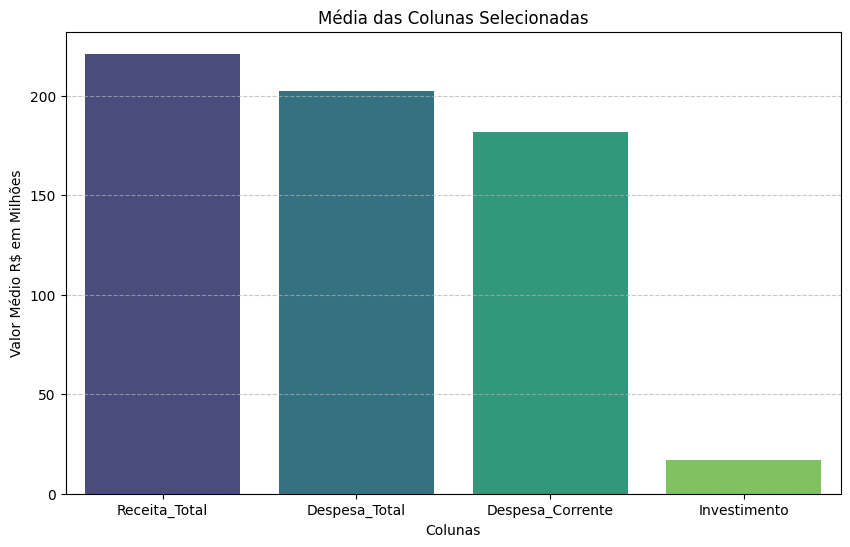

In [118]:
# Colunas que voc√™ para exibir a m√©dia
colunas_para_media = ['Receita_Total', 'Despesa_Total', 'Despesa_Corrente', 'Investimento']

# Calcula a m√©dia das colunas selecionadas
medias = df_real_milhao[colunas_para_media].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=medias.index, y=medias.values, palette='viridis')
plt.title('M√©dia das Colunas Selecionadas')
plt.xlabel('Colunas')
plt.ylabel('Valor M√©dio R$ em Milh√µes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gr√°fico com a m√©dia das 4 principais contas durante o per√≠odo de 2018 a 2024 dos Municip√≠os do Estado do Cear√°:
- `Receita_Total`: m√©dia da receita total;
- `Despesa_Total`: m√©dia da despesa total, incluindo todos os tipos de despesas;
- `Despesa_Corrente`: m√©dia da despesa corrente. A despesa corrente nas contas p√∫blicas √© o conjunto de gastos realizados pelo governo para manter seu funcionamento regular, sem gerar novos bens ou servi√ßos duradouros. Ela cobre principalmente despesas obrigat√≥rias, administrativas e operacionais que ocorrem ano ap√≥s ano.
- `Investimento`: m√©dia do investimento. √â uma despesa de capital destinada √† aquisi√ß√£o ou constru√ß√£o de bens duradouros que aumentam o patrim√¥nio p√∫blico ou melhoram os servi√ßos √† popula√ß√£o.


### Desvio Padr√£o

O desvio padr√£o √© uma medida de dispers√£o que quantifica a quantidade de varia√ß√£o ou dispers√£o de um conjunto de valores. Um desvio padr√£o baixo indica que os pontos de dados tendem a estar pr√≥ximos da m√©dia do conjunto, enquanto um desvio padr√£o alto indica que os pontos de dados est√£o espalhados por uma faixa maior de valores. Ele √© a raiz quadrada da vari√¢ncia.

In [119]:
# Desvio padr√£o dos atributos num√©ricos do dataset
df_real_milhao.describe().loc['std']

Codigo_Municipio           4029.86
Ano                           1.41
Populacao                199387.17
Receita_Total               892.64
Receita_Exceto_Intra        840.64
Receita_Corrente            783.18
Receita_Capital              64.36
Receita_Intra                52.77
Receita_Intra_Corrente       52.77
Receita_Intra_Capital         0.48
Despesa_Total               824.85
Despesa_Corrente            742.77
Despesa_Capital              83.50
Investimento                 69.19
Name: std, dtype: float64

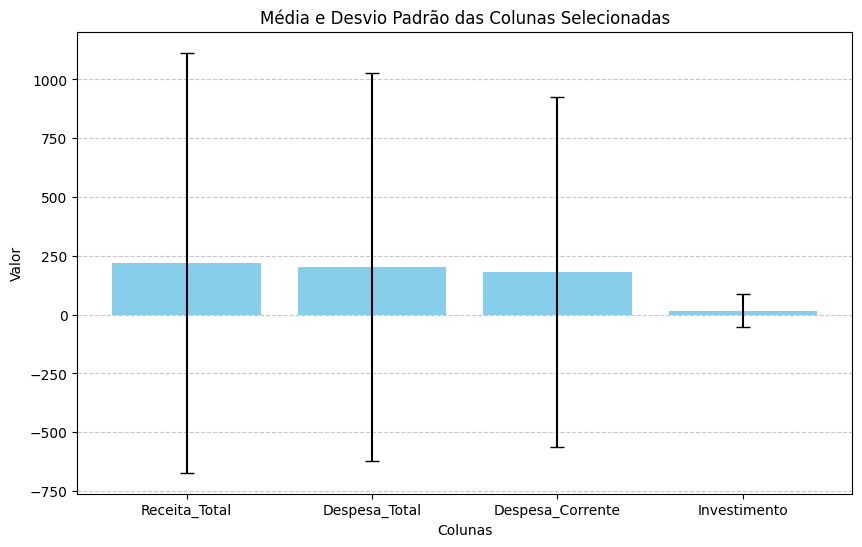

In [120]:
# Colunas que exibir a m√©dia e o desvio padr√£o
colunas_para_analise = ['Receita_Total', 'Despesa_Total', 'Despesa_Corrente', 'Investimento']

# Calcular as m√©dias e desvios padr√£o
medias = df_real_milhao[colunas_para_analise].mean()
desvios_padrao = df_real_milhao[colunas_para_analise].std()

# Criar um DataFrame para facilitar a plotagem
df_plot = pd.DataFrame({
    'M√©dia': medias,
    'Desvio Padr√£o': desvios_padrao
})

plt.figure(figsize=(10, 6))
# Usamos barras de erro para representar o desvio padr√£o
plt.bar(df_plot.index, df_plot['M√©dia'], yerr=df_plot['Desvio Padr√£o'], capsize=5, color='skyblue')
plt.title('M√©dia e Desvio Padr√£o das Colunas Selecionadas')
plt.xlabel('Colunas')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observamos que:
- Grande desvio padr√£o em **`Receita`**, **`Despesa Total`** e **`Despesa Corrente`** em reala√ß√£o √†s m√©dias, indica grande desigualdade entre os Munic√≠pios.

- **`Despesas Correntes`** dominam o or√ßamento dos entes p√∫blicos, com m√©dia pr√≥xima √† despesa total.
- **`Investimentos`** s√£o muito pequenos em compara√ß√£o ‚Äî representam uma pequena fra√ß√£o do or√ßamento.
- O baixo desvio padr√£o de **`Investimentos`** sugere que mesmo os Munic√≠pios com maiores or√ßamentos n√£o investem proporcionalmente mais, o investimento √© geralmente baixo em todos.

## Matriz de Correla√ß√£o

A matriz de correla√ß√£o mede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear que os atributos num√©ricos das contas podem ter. Valores pr√≥ximos a 1 indicam uma forte correla√ß√£o positiva, -1 uma forte correla√ß√£o negativa, e 0 aus√™ncia de correla√ß√£o linear.

Matriz de Correla√ß√£o para as Contas Selecionadas:

                  Receita_Total  Receita_Corrente  Despesa_Total  \
Receita_Total              1.00              1.00           1.00   
Receita_Corrente           1.00              1.00           1.00   
Despesa_Total              1.00              1.00           1.00   
Despesa_Corrente           1.00              1.00           1.00   
Despesa_Capital            0.98              0.98           0.98   
Investimento               0.97              0.97           0.98   

                  Despesa_Corrente  Despesa_Capital  Investimento  
Receita_Total                 1.00             0.98          0.97  
Receita_Corrente              1.00             0.98          0.97  
Despesa_Total                 1.00             0.98          0.98  
Despesa_Corrente              1.00             0.98          0.97  
Despesa_Capital               0.98             1.00          1.00  
Investimento                  0.97             1.00          1

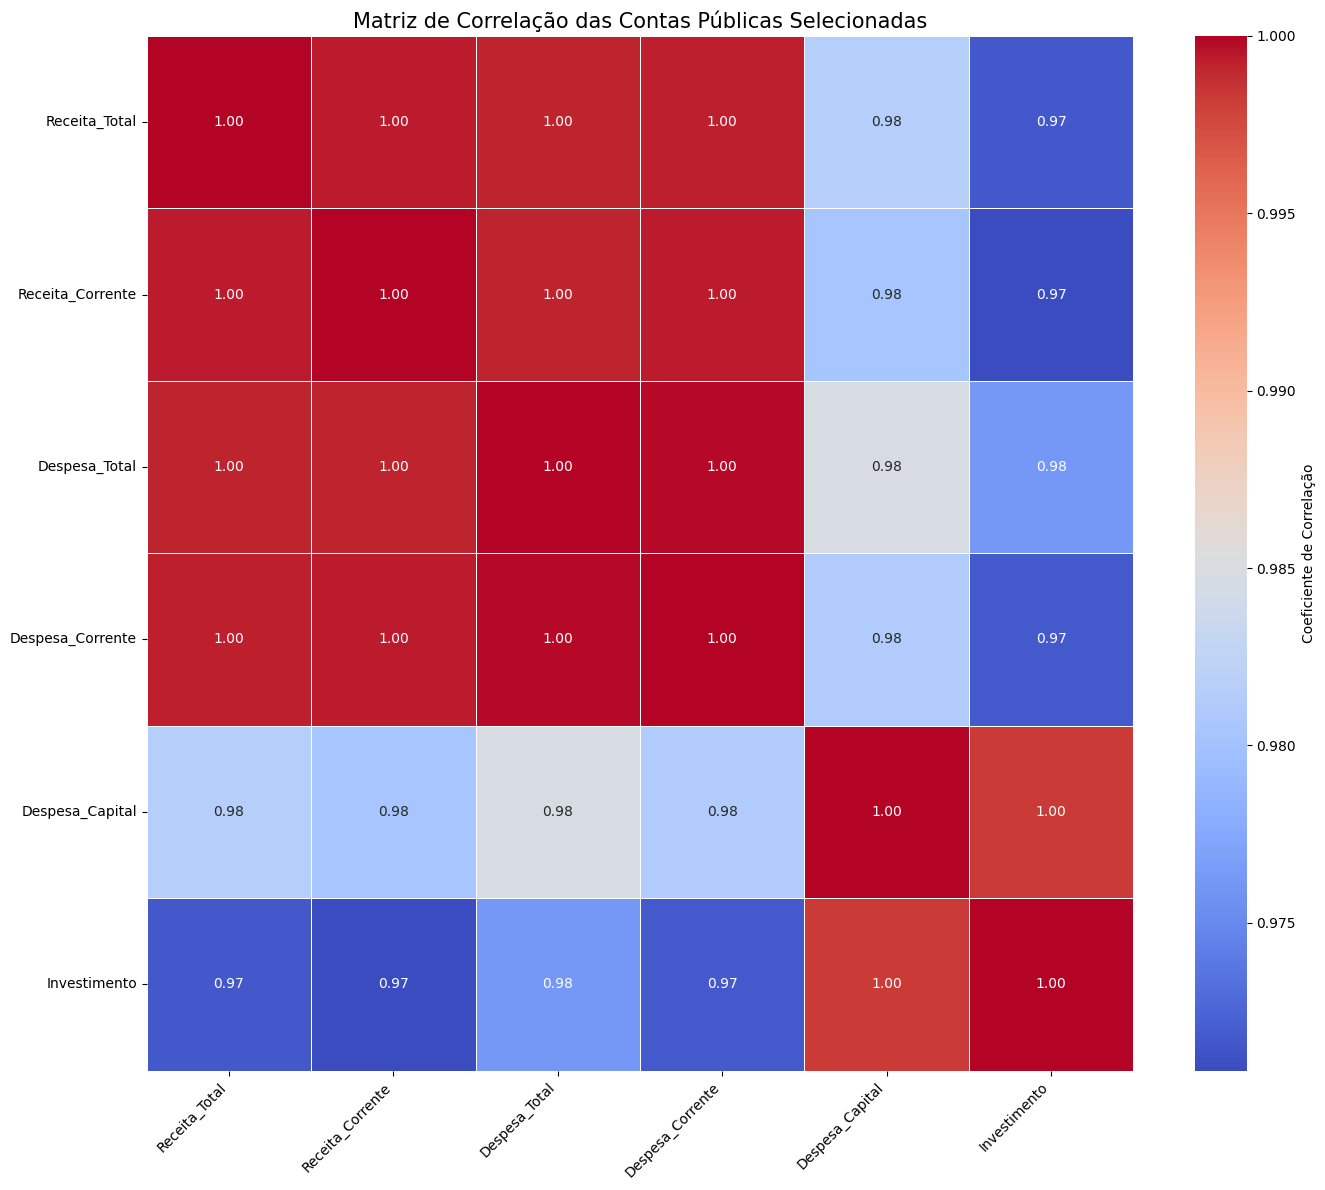

In [121]:

# Selecionar APENAS as colunas que voc√™ ser√£o utilizadas na matriz de correla√ß√£o ---
colunas_para_correlacao = [
    'Receita_Total', 'Receita_Corrente',
    'Despesa_Total', 'Despesa_Corrente',
    'Despesa_Capital', 'Investimento'
]

# Filtrar o DataFrame para conter apenas essas colunas
df_para_corr = df_real_milhao[colunas_para_correlacao]

# Criar a Matriz de Correla√ß√£o ---
matriz_correlacao = df_para_corr.corr()

print("Matriz de Correla√ß√£o para as Contas Selecionadas:\n")
print(matriz_correlacao)

# Visualizar a Matriz de Correla√ß√£o como um Heatmap ---
plt.figure(figsize=(14, 12)) # Ajusta o tamanho para uma matriz maior
sns.heatmap(
    matriz_correlacao,
    annot=True,     # Mostra os valores de correla√ß√£o
    cmap='coolwarm',# Azul para correla√ß√£o positiva, vermelho para negativa
    fmt=".2f",      # Formata os valores com 2 casas decimais
    linewidths=.5,  # Adiciona linhas entre as c√©lulas
    cbar_kws={'label': 'Coeficiente de Correla√ß√£o'} # Adiciona r√≥tulo √† barra de cor
)
plt.title('Matriz de Correla√ß√£o das Contas P√∫blicas Selecionadas', fontsize=15)
plt.xticks(rotation=45, ha='right') # Rotaciona r√≥tulos do eixo X para melhor legibilidade
plt.yticks(rotation=0) # Mant√©m r√≥tulos do eixo Y na horizontal
plt.tight_layout() # Ajusta o layout para garantir que tudo caiba na figura
plt.savefig('matriz_correlacao_contas_publicas.png', dpi=300) # Salva o gr√°fico
plt.show()

### Interpreta√ß√£o do coeficiente de correla√ß√£o:

Valor	Interpreta√ß√£o:

- +1.00	Correla√ß√£o perfeita e positiva
- 0.70 a 0.99	Correla√ß√£o forte positiva
- 0.40 a 0.69	Correla√ß√£o moderada positiva (n√£o apareceu no gr√°fico)
- 0.00 a 0.39	Correla√ß√£o fraca ou nula
Valores negativos	Correla√ß√£o negativa (n√£o apareceu no gr√°fico)

Com base na matriz de correla√ß√£o, podemos tirar as seguintes conclus√µes:

**1. Rela√ß√µes Extremamente Fortes e Positivas**

Todas as vari√°veis apresentadas (`Receita Total`, `Receita Corrente`, `Despesa Total`, `Despesa Corrente`, `Despesa de Capital` e `Investimento`) t√™m uma correla√ß√£o extremamente alta e positiva entre si. A correla√ß√£o em todos os pares √© igual ou superior a 0,97. Isso significa que, neste conjunto de dados, todas as contas p√∫blicas selecionadas tendem a se mover na mesma dire√ß√£o de forma muito previs√≠vel. Quando uma aumenta, as outras tamb√©m aumentam.


**2. Rela√ß√µes Perfeitas (Correla√ß√£o = 1,00)**

A matriz revela v√°rias correla√ß√µes perfeitas, que indicam uma rela√ß√£o linear e direta entre as vari√°veis. As mais not√°veis s√£o:

`Receita Total` e `Receita Corrente`: A correla√ß√£o de 1,00 sugere que a `Receita Corrente` √© o principal componente da `Receita Total` e que ambas se comportam de maneira id√™ntica.

`Despesa Total` e `Despesa Corrente`: Da mesma forma, a `Despesa Corrent`e √© perfeitamente correlacionada com a `Despesa Total`, indicando uma depend√™ncia total.

`Receita Total` e `Despesa Total`: A correla√ß√£o de 1,00 entre a `Receita Total` e a `Despesa Total` √© um dos pontos mais importantes. Isso indica que, para este conjunto de dados, cada aumento na receita √© acompanhado por um aumento perfeitamente proporcional na despesa.

**3. Rela√ß√µes Fortes, mas n√£o Perfeitas (Correla√ß√£o < 1,00)**

As contas de capital (`Despesa de Capital` e `Investimento`) t√™m uma correla√ß√£o ligeiramente menor (em torno de 0,97 e 0,98) com as contas de receita e despesa correntes. Embora a rela√ß√£o ainda seja muito forte, n√£o √© perfeita. Isso sugere que, embora o investimento e o gasto de capital acompanhem o crescimento geral da receita e da despesa, a propor√ß√£o exata pode variar um pouco, ao contr√°rio das contas "Total" e "Corrente" que se movem em um ritmo id√™ntico.

Em resumo, a principal conclus√£o √© que todas as contas p√∫blicas analisadas est√£o fortemente interligadas e se movem em un√≠ssono. A matriz sugere um cen√°rio de finan√ßas p√∫blicas onde os or√ßamentos s√£o rigidamente controlados, com as despesas aumentando de forma quase exata em resposta ao crescimento das receitas.


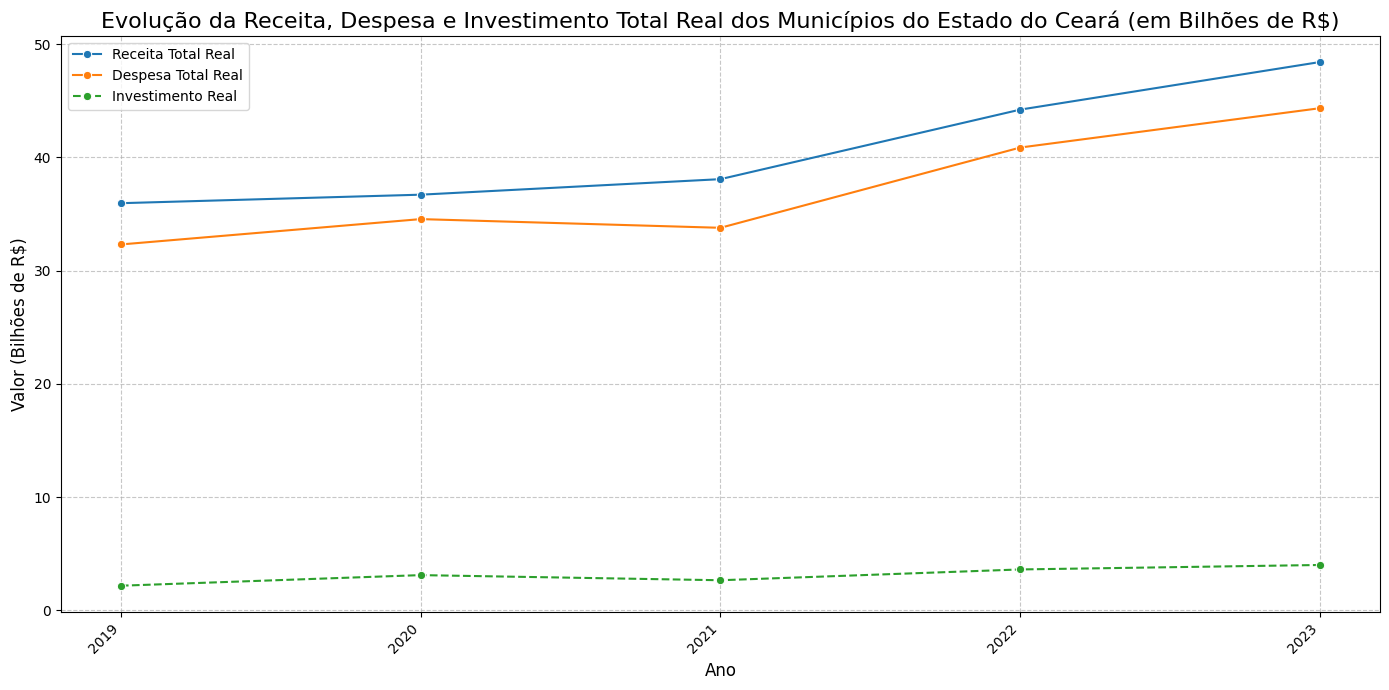


Dados agregados para a evolu√ß√£o anual (Receita, Despesa e Investimento em Bilh√µes de R$):
    Ano  Receita_Total  Despesa_Total  Investimento
0  2019          35.96          32.31          2.18
1  2020          36.71          34.55          3.12
2  2021          38.08          33.78          2.66
3  2022          44.22          40.87          3.62
4  2023          48.42          44.35          4.01


In [122]:
# Agrupar os dados por 'Ano' e somar as colunas de interesse
# As colunas em 'df_real_bilhao' j√° est√£o em bilhoes de R$.
evolucao_anual = df_real_bilhao.groupby('Ano')[['Receita_Total', 'Despesa_Total', 'Investimento']].sum().reset_index()

# Criar o gr√°fico de linha
plt.figure(figsize=(14, 7)) # Tamanho do gr√°fico para melhor visualiza√ß√£o

# Linha para Receita Total
sns.lineplot(data=evolucao_anual, x='Ano', y='Receita_Total', marker='o', label='Receita Total Real')

# Linha para Despesa Total
sns.lineplot(data=evolucao_anual, x='Ano', y='Despesa_Total', marker='o', label='Despesa Total Real')

# Linha para Investimento
sns.lineplot(data=evolucao_anual, x='Ano', y='Investimento', marker='o', label='Investimento Real', linestyle='--') # Adicionando um linestyle
#diferente para destacar

# Adicionar t√≠tulo e r√≥tulos
plt.title('Evolu√ß√£o da Receita, Despesa e Investimento Total Real dos Munic√≠pios do Estado do Cear√° (em Bilh√µes de R$)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor (Bilh√µes de R$)', fontsize=12)

# Adicionar grade para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar legenda
plt.legend(fontsize=10)

# Ajustar os ticks do eixo X para mostrar todos os anos, se poss√≠vel
plt.xticks(evolucao_anual['Ano'].unique(), rotation=45, ha='right')

# Melhorar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gr√°fico
plt.show()

print("\nDados agregados para a evolu√ß√£o anual (Receita, Despesa e Investimento em Bilh√µes de R$):")
print(evolucao_anual)

A `Receita_Total` e o `Investimento` n√£o s√£o uniformes no decorrer da s√©rie temporal, mas apresentam uma inclina√ß√£o mais ascendente a partir de 2021. Observa-se por outro lado que a linha tracejada do investimento n√£o aconpanha essa tend√™ncia, permanecendo quase que uma reta no mesmo per√≠odo a partir de 2021.



Primeiras linhas do DataFrame com os novos percentuais:
    Ano Munic√≠pio  Investimento  Despesa_Total  Perc_Investimento_Despesa
0  2019   Abaiara          2.31          40.42                       5.71
1  2020   Abaiara          2.06          39.61                       5.20
2  2021   Abaiara          0.92          40.73                       2.27
3  2022   Abaiara          1.72          47.38                       3.64
4  2023   Abaiara          4.54          57.46                       7.89


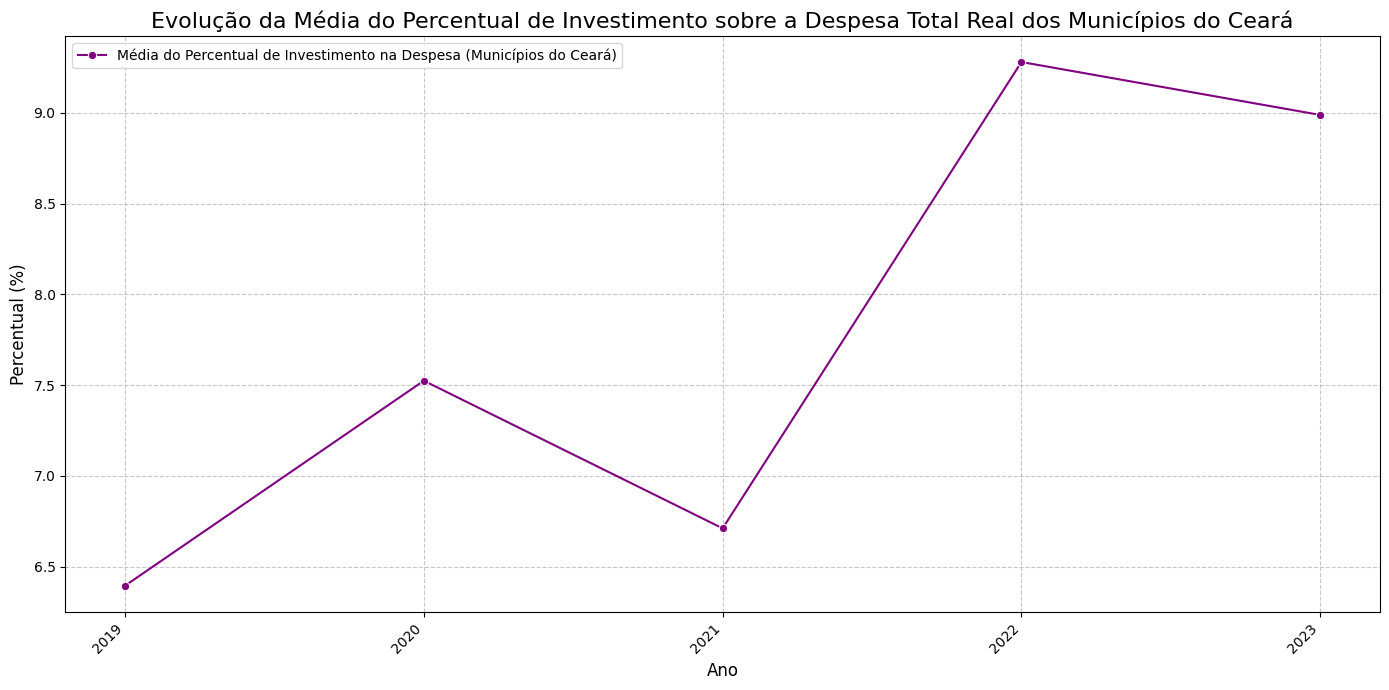

In [123]:
# Calcular o percentual de Investimento sobre a Despesa Total
df_com_percentuais = df_real_milhao.copy()

# Evitar divis√£o por zero
df_com_percentuais['Perc_Investimento_Despesa'] = (
    df_com_percentuais['Investimento'] / df_com_percentuais['Despesa_Total']
) * 100

print("Primeiras linhas do DataFrame com os novos percentuais:")
print(df_com_percentuais[['Ano', 'Munic√≠pio', 'Investimento', 'Despesa_Total', 'Perc_Investimento_Despesa']].head())

# Agrupar para ver a m√©dia anual do percentual
evolucao_perc_investimento_anual = df_com_percentuais.groupby('Ano')['Perc_Investimento_Despesa'].mean().reset_index()

# Criar o gr√°fico de linha para o percentual m√©dio
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=evolucao_perc_investimento_anual,
    x='Ano',
    y='Perc_Investimento_Despesa',
    marker='o',
    color='purple',
    label='M√©dia do Percentual de Investimento na Despesa (Munic√≠pios do Cear√°)'
)

plt.title('Evolu√ß√£o da M√©dia do Percentual de Investimento sobre a Despesa Total Real dos Munic√≠pios do Cear√°', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(evolucao_perc_investimento_anual['Ano'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Evolu√ß√£o m√©dia do percentual de **`Investimento`** sobre a **`Despesa Total Real`** dos Munic√≠pios apresenta um aumento acentuado entre os anos de 2021 a 2022. Isso pode ser um indicativo de gastos com o epis√≥dio da pandemia de COVID-19 que obrigou todos os entes p√∫blicos a aumentarem significativamente seus investimentos na sa√∫de p√∫blica. Entre 2022 a 2023 ocorre uma queda no percentual.

Somat√≥rio Total de Despesa por Munic√≠pio do Cear√° (todos os anos no DataFrame):

                   Munic√≠pio  Despesa_Total
58                 Fortaleza          55.35
43                   Caucaia           6.45
103                Maracana√∫           5.53
162                   Sobral           5.38
98         Juazeiro do Norte           4.19
87                 Itapipoca           2.58
55                   Eus√©bio           2.56
50                     Crato           2.39
165  S√£o Gon√ßalo do Amarante           2.23
11                   Aquiraz           2.07
22                  Barbalha           1.85
76                    Iguatu           1.83
12                   Aracati           1.76
104               Maranguape           1.72
70                 Horizonte           1.58
150             Quixeramobim           1.56
33                   Canind√©           1.55
148                  Quixad√°           1.54
173                  Tiangu√°           1.45
154                   Russas

/tmp/ipython-input-3658428170.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Despesa_Total', y='Munic√≠pio', data=top_23_municipios, palette='viridis')


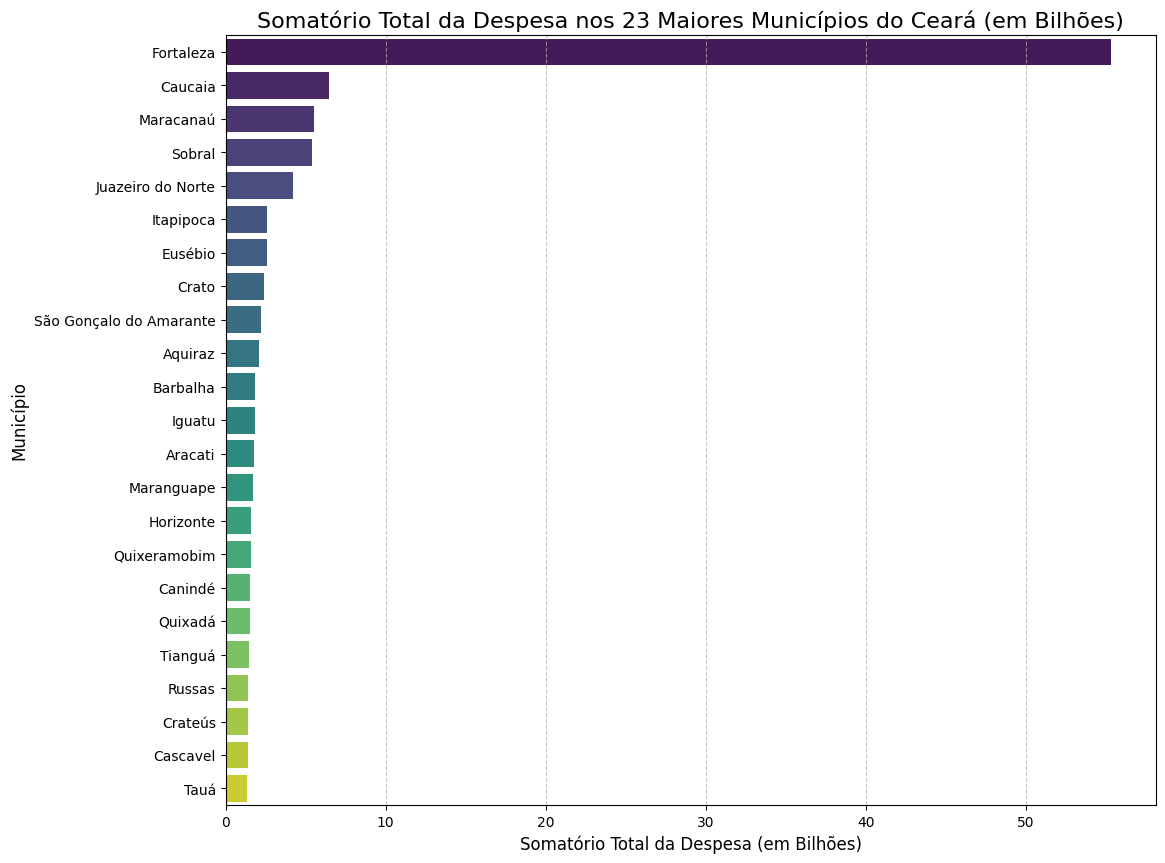

In [124]:
# O DataFrame de entrada √© o 'df_real_bilhao' com os valores em bilh√µes
# e as colunas de munic√≠pios.

# Calcula o somat√≥rio da Despesa Total por Munic√≠pio
despesa_total_por_municipio = df_real_bilhao.groupby('Munic√≠pio')['Despesa_Total'].sum().reset_index()

# Ordena os dados para facilitar a leitura do gr√°fico (maior para o menor)
despesa_total_por_municipio = despesa_total_por_municipio.sort_values(by='Despesa_Total', ascending=False)

print("Somat√≥rio Total de Despesa por Munic√≠pio do Cear√° (todos os anos no DataFrame):\n")
print(despesa_total_por_municipio.head(23))


# --- Plotando os dados ---

# Seleciona os 23 primeiros munic√≠pios
top_23_municipios = despesa_total_por_municipio.head(23)

plt.figure(figsize=(12, 10)) # Ajusta o tamanho da figura para acomodar as 23 barras

# Cria o gr√°fico de barras horizontal (invertido)
sns.barplot(x='Despesa_Total', y='Munic√≠pio', data=top_23_municipios, palette='viridis')

plt.title('Somat√≥rio Total da Despesa nos 23 Maiores Munic√≠pios do Cear√° (em Bilh√µes)', fontsize=16)
plt.xlabel('Somat√≥rio Total da Despesa (em Bilh√µes)', fontsize=12)
plt.ylabel('Munic√≠pio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

O estado do **Cear√°** tem **184 munic√≠pios**, para o gr√°fico acima n√£o ficar com muita informa√ß√£o visual foi restringido a exibi√ß√£o para **12,5%** do total de munic√≠pios, totalizando exatamente **23**.

Percebe-se visualmente uma enorme disparidade do primeiro lugar em gastos comparando com os demais. `Fortaleza` gastou no per√≠odo 5**5 bilh√µes e 400 milh√µes** de reais. Enquanto isso os demais 23 gastaram **53 bilh√µes e 770 milh√µes** de reais. Ou seja a capital do Cear√° gastou mais que os outros **22** **munic√≠pios** juntos.


Somat√≥rio de Investimento por Munic√≠pio do Cear√°:

                   Munic√≠pio  Investimento
58                 Fortaleza          4.49
43                   Caucaia          0.78
162                   Sobral          0.62
103                Maracana√∫          0.54
12                   Aracati          0.32
98         Juazeiro do Norte          0.30
87                 Itapipoca          0.25
50                     Crato          0.21
11                   Aquiraz          0.19
55                   Eus√©bio          0.17
70                 Horizonte          0.17
165  S√£o Gon√ßalo do Amarante          0.16
62                    Granja          0.16
89                   Itarema          0.14
127                 Pacatuba          0.14
171                     Tau√°          0.14
134                  Parambu          0.13
30               Brejo Santo          0.13
2                     Acara√∫          0.12
29                Boa Viagem          0.12
122              Nova Russas        

/tmp/ipython-input-2495853549.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Investimento', y='Munic√≠pio', data=top_23_municipios_inv, palette='viridis')


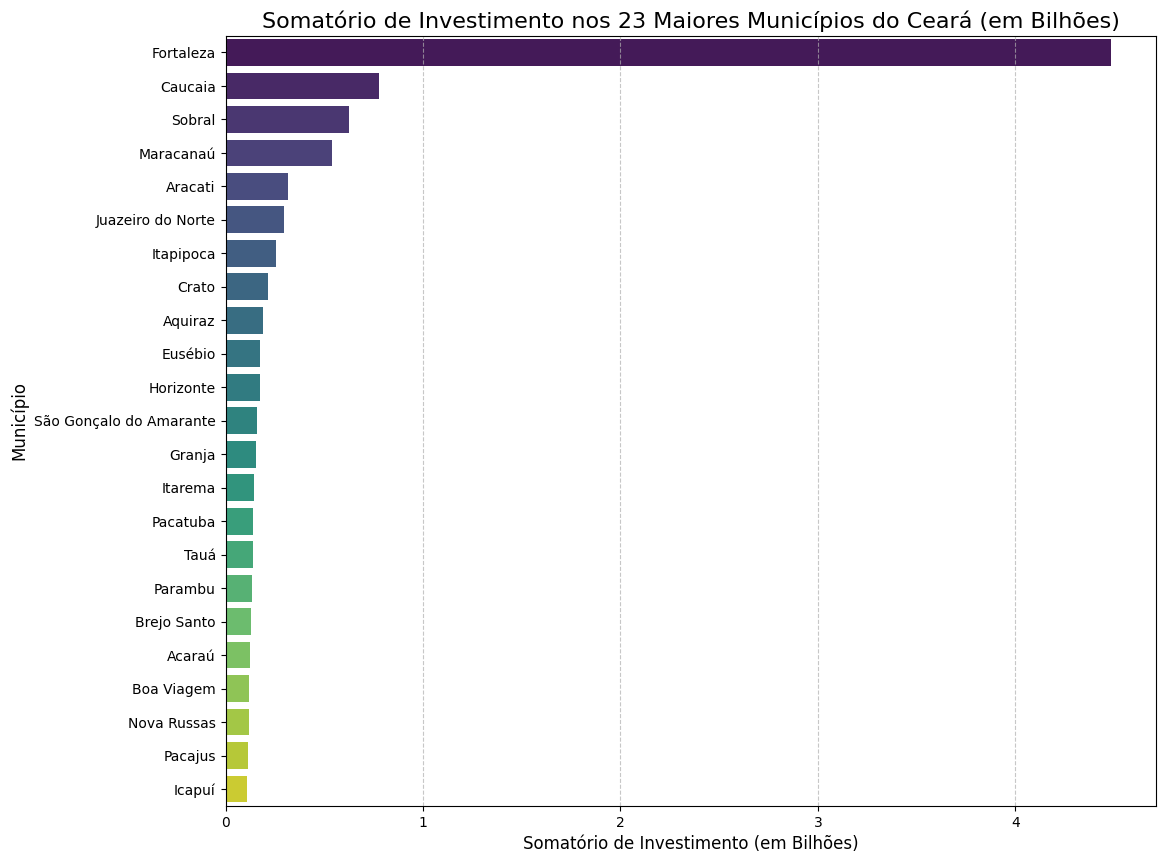

In [125]:
# O DataFrame de entrada √© o 'df_real_bilhao' com os valores em bilh√µes
# e as colunas de munic√≠pios.

# Calcula o somat√≥rio do Investimento por Munic√≠pio
investimento_por_municipio = df_real_bilhao.groupby('Munic√≠pio')['Investimento'].sum().reset_index()

# Ordena os dados para o gr√°fico ser mais f√°cil de ler, do maior para o menor
investimento_por_municipio = investimento_por_municipio.sort_values(by='Investimento', ascending=False)

print("Somat√≥rio de Investimento por Munic√≠pio do Cear√°:\n")
print(investimento_por_municipio.head(23))


# --- Plotando os dados ---

# Seleciona os 23 primeiros munic√≠pios
top_23_municipios_inv = investimento_por_municipio.head(23)

plt.figure(figsize=(12, 10)) # Ajusta o tamanho da figura para acomodar as 23 barras

# Cria o gr√°fico de barras horizontal
sns.barplot(x='Investimento', y='Munic√≠pio', data=top_23_municipios_inv, palette='viridis')

plt.title('Somat√≥rio de Investimento nos 23 Maiores Munic√≠pios do Cear√° (em Bilh√µes)', fontsize=16)
plt.xlabel('Somat√≥rio de Investimento (em Bilh√µes)', fontsize=12)
plt.ylabel('Munic√≠pio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

```
C√≥d.Munic√≠pio      Munic√≠pio    Investimento
58                 Fortaleza       4485.45
43                   Caucaia        777.12
162                   Sobral        623.51
103                Maracana√∫        537.72
12                   Aracati        317.23
98         Juazeiro do Norte        297.99
87                 Itapipoca        253.84
50                     Crato        214.05
11                   Aquiraz        188.06
55                   Eus√©bio        174.84
70                 Horizonte        172.13
165  S√£o Gon√ßalo do Amarante        158.13
62                    Granja        155.95
89                   Itarema        142.84
127                 Pacatuba        141.45
171                     Tau√°        137.64
134                  Parambu        134.83
30               Brejo Santo        129.09
2                     Acara√∫        124.63
29                Boa Viagem        116.86
122              Nova Russas        116.78
126                  Pacajus        114.37
74                    Icapu√≠        109.10

```



Analisando o somat√≥rio do **`Investimento`**, tamb√©m restringindo a visualizac√£o para **12,5%** do total de munic√≠pios, totalizando exatamente **23**.
Visualmente continua a disparidade do primeiro lugar em gastos comparando com os demais. `Fortaleza` investiu no per√≠odo **4 bilh√µes e 485 milh√µes** de reais. Enquanto isso os demais **22** gastaram **5 bilh√µes e 138 milh√µes** reais.

Pela √≥tica do **`Investimento`** em valores brutos os outros 22 munic√≠pios superaram `Fortaleza` no total investido, o que pela rela√ß√£o anterior n√£o aconteceu (**`Despesa Total`**).

Olhar apenas para n√∫meros absolutos pode indicar que a capital do Cear√° estar √† frente de todos os outros munic√≠pios do estado nesses quesitos analisados, bem como outros indicadores que tenham rela√ß√£o com o presente objeto de estudo.

In [126]:
# Para garantir a exibi√ß√£o do n√∫mero completo, sem nota√ß√£o cient√≠fica
pd.set_option('display.float_format', '{:,.2f}'.format)


# Calcular o investimento per capita para TODOS os munic√≠pios
# O c√°lculo √© feito no DataFrame original
df_real_milhao['Investimento_Per_Capita'] = np.where(
    df_real_milhao['Populacao'] > 0,
    df_real_milhao['Investimento'] / df_real_milhao['Populacao'],
    0
)

# Converter o valor de "milh√µes por pessoa" para "reais por pessoa"
df_real_milhao['Investimento_Per_Capita_Reais'] = df_real_milhao['Investimento_Per_Capita'] * 1_000_000

# Calcular a m√©dia do investimento per capita para CADA MUNIC√çPIO
# Agrupamento feito em todo o DataFrame, n√£o apenas nos top 23
media_por_municipio = df_real_milhao.groupby('Munic√≠pio')['Investimento_Per_Capita_Reais'].mean().reset_index()

# Opcional: Ordenar para ver os que mais investem no topo da lista
media_por_municipio = media_por_municipio.sort_values(by='Investimento_Per_Capita_Reais', ascending=False)

# Exibir o resultado final em um formato claro
print("M√©dia do Investimento PER CAPITA por Munic√≠pio (em Reais):\n")
print(media_por_municipio)

M√©dia do Investimento PER CAPITA por Munic√≠pio (em Reais):

      Munic√≠pio  Investimento_Per_Capita_Reais
74       Icapu√≠                       1,087.50
63    Granjeiro                         986.33
146  Potiretama                         982.50
134     Parambu                         858.13
12      Aracati                         846.42
..          ...                            ...
3      Acopiara                         114.51
34   Capistrano                         101.10
175      Tururu                          91.18
24        Barro                          88.26
148     Quixad√°                          76.17

[184 rows x 2 columns]


Se levarmos em considera√ß√£o o `fator populacional`, veremos que o cen√°rio acima
muda. Cidades que lideravam em volume absoluto agora est√£o no meio ou na parte de baixo do gr√°fico. Fortaleza, at√© ent√£o l√≠der absoluto, est√° agora em **`72¬∫ lugar`**. Isso acontece porque seu enorme volume de investimento √© "dilu√≠do" por sua popula√ß√£o igualmente massiva. Em contrapartida, o topo do ranking √© agora ocupado por cidades com popula√ß√µes menores. Nesses locais, um volume de investimento que seria modesto para Fortaleza tem um grande impacto per capita.

Nessa perspectiva, a **`m√©dia per capta de investimento por habitante`** (mensura o montante de investimento direcionado, em m√©dia, a cada cidad√£o) em reais para o per√≠odo analisado em cada munic√≠pio do estado do Cear√° mostra a import√¢ncia de um olhar a partir de um outro crit√©rio.


/tmp/ipython-input-1321828123.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


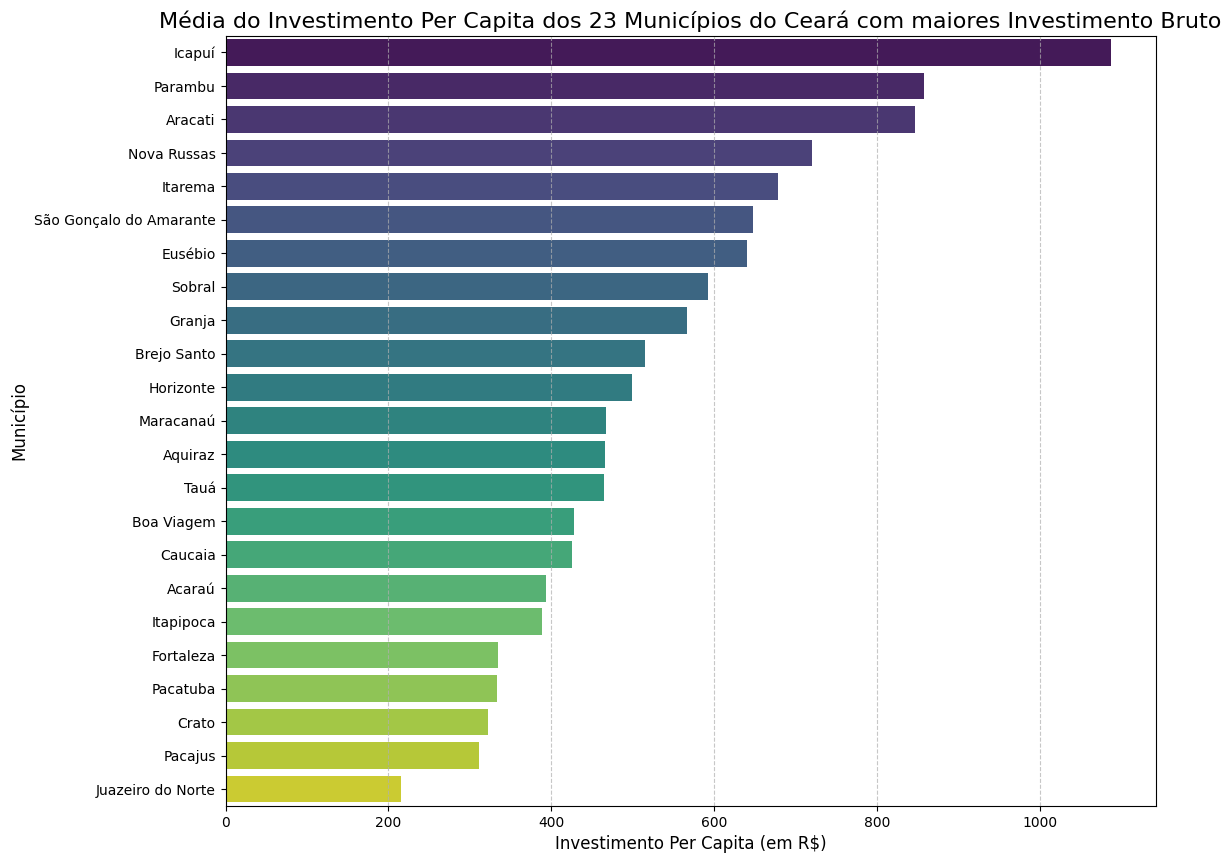

In [127]:
# Para garantir a exibi√ß√£o do n√∫mero completo, sem nota√ß√£o cient√≠fica
pd.set_option('display.float_format', '{:,.2f}'.format)


# Encontrar os 23 munic√≠pios com maior investimento total
investimento_total = df_real_milhao.groupby('Munic√≠pio')['Investimento'].sum().reset_index()
investimento_total = investimento_total.sort_values(by='Investimento', ascending=False)
top_23_municipios = investimento_total.head(23)
nomes_top_23 = top_23_municipios['Munic√≠pio'].tolist()

# Filtrar o DataFrame original para incluir apenas os top 23
df_top_23 = df_real_milhao[df_real_milhao['Munic√≠pio'].isin(nomes_top_23)].copy()

# Garante que as colunas 'populacao' e 'Investimento' sejam num√©ricas
df_top_23['Populacao'] = pd.to_numeric(df_top_23['Populacao'], errors='coerce')
df_top_23['Investimento'] = pd.to_numeric(df_top_23['Investimento'], errors='coerce')
df_top_23.dropna(subset=['Populacao', 'Investimento'], inplace=True)

# Calcular o investimento per capita para os 23 munic√≠pios
df_top_23['Investimento_Per_Capita'] = np.where(
    df_top_23['Populacao'] > 0,
    df_top_23['Investimento'] / df_top_23['Populacao'],
    0
)

# Converter o valor de "milh√µes por pessoa" para "reais por pessoa"
df_top_23['Investimento_Per_Capita_Reais'] = df_top_23['Investimento_Per_Capita'] * 1_000_000

# Calcular a m√©dia do investimento per capita para CADA MUNIC√çPIO
media_por_municipio = df_top_23.groupby('Munic√≠pio')['Investimento_Per_Capita_Reais'].mean().reset_index()
media_por_municipio = media_por_municipio.sort_values(by='Investimento_Per_Capita_Reais', ascending=False)


# --- ADI√á√ÉO: C√≥digo para Plotar o Gr√°fico de Barras Horizontais ---
plt.figure(figsize=(12, 10)) # Ajusta o tamanho da figura para acomodar as 23 barras

# Cria o gr√°fico de barras horizontais
sns.barplot(
    x='Investimento_Per_Capita_Reais',
    y='Munic√≠pio',
    data=media_por_municipio,
    palette='viridis'
)

plt.title('M√©dia do Investimento Per Capita dos 23 Munic√≠pios do Cear√° com maiores Investimento Bruto', fontsize=16)
plt.xlabel('Investimento Per Capita (em R$)', fontsize=12)
plt.ylabel('Munic√≠pio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

A lista acima que mostra o **`Investimento Per Capta`** das 23 cidades que mais gastam com `Investimento em Valores Brutos`. A cidade de `Icapu√≠` que aparecia na √∫ltima coloca√ß√£o em um gr√°fico mais acima que mostra as 23 cidades do Estado que mais investem em valores brutos, agora assume a lideran√ßa quando se analisa o `Investimento Per Capta`.

In [128]:
# Lista das cidades inclu√≠das na an√°lise
cidades_selecionadas = [
    'Fortaleza',
    'Caucaia',
    'Sobral',
    'Maracana√∫',
    'Aracati',
    'Juazeiro do Norte',
    'Itapipoca',
    'Crato',
    'Aquiraz',
    'Eus√©bio'
]

# Filtra o DataFrame para selecionar apenas as linhas onde o Munic√≠pio est√° na lista
dados_cidades_selecionadas = df_real_milhao[df_real_milhao['Munic√≠pio'].isin(cidades_selecionadas)].copy()

# Exibe a popula√ß√£o ano a ano para cada cidade selecionada
print("Popula√ß√£o das cidades selecionadas, ano a ano:\n")
if not dados_cidades_selecionadas.empty:
    # A coluna `Populacao` j√° foi limpa e formatada em passos anteriores
    print(dados_cidades_selecionadas[['Munic√≠pio', 'Ano', 'Populacao']].sort_values(by=['Munic√≠pio', 'Ano']))
else:
    print("Dados para as cidades selecionadas n√£o foram encontrados no DataFrame.")

Popula√ß√£o das cidades selecionadas, ano a ano:

             Munic√≠pio   Ano  Populacao
55             Aquiraz  2019      79563
56             Aquiraz  2020      80271
57             Aquiraz  2021      80935
58             Aquiraz  2022      81581
59             Aquiraz  2023      81581
60             Aracati  2019      74084
61             Aracati  2020      74547
62             Aracati  2021      74975
63             Aracati  2022      75392
64             Aracati  2023      75392
215            Caucaia  2019     363982
216            Caucaia  2020     361400
217            Caucaia  2021     365212
218            Caucaia  2022     368918
219            Caucaia  2023     368918
250              Crato  2019     131372
251              Crato  2020     132123
252              Crato  2021     133031
253              Crato  2022     133913
254              Crato  2023     133913
275            Eus√©bio  2019      52880
276            Eus√©bio  2020      53618
277            Eus√©bio  20

**Popula√ß√£o** das 10 que mais gastam com `Investimento em Valores Brutos`. Fortaleza tem uma concentra√ß√£o populacional (quase 10X maior se comparado a segunda cidade mais populosa Caucaia.

Fortaleza a capital do estado do Cear√° possui uma concentra√ß√£o populacional massiva, com 2.703.391 no ano de 2023. Esse n√∫mero representa mais de 7 vezes a popula√ßao do munic√≠pio que fica em segundo lugar em termos populacional, Caucaia com 368.918 pessoas no mesmo ano.

In [129]:
# Para garantir a exibi√ß√£o do n√∫mero completo, sem nota√ß√£o cient√≠fica
pd.set_option('display.float_format', '{:,.2f}'.format)


# Calcular o investimento per capita para TODOS os munic√≠pios
# O c√°lculo √© feito no DataFrame original
df_real_milhao['Investimento_Per_Capita'] = np.where(
    df_real_milhao['Populacao'] > 0,
    df_real_milhao['Investimento'] / df_real_milhao['Populacao'],
    0
)

# Converter o valor de "milh√µes por pessoa" para "reais por pessoa"
df_real_milhao['Investimento_Per_Capita_Reais'] = df_real_milhao['Investimento_Per_Capita'] * 1_000_000

# Calcular a m√©dia CONSOLIDADA de toda a coluna
media_consolidada = df_real_milhao['Investimento_Per_Capita_Reais'].mean()

# Exibir o resultado final em um formato claro
print("M√©dia Consolidada do Investimento Per Capita para todos os Munic√≠pios do Cear√° para o per√≠odo analisado:")
print(f"R$ {media_consolidada:,.2f} por pessoa.")

# Para retornar √† formata√ß√£o padr√£o do Pandas, se necess√°rio
# pd.reset_option('display.float_format')

M√©dia Consolidada do Investimento Per Capita para todos os Munic√≠pios do Cear√° para o per√≠odo analisado:
R$ 345.71 por pessoa.


In [130]:
# Para garantir a exibi√ß√£o do n√∫mero completo, sem nota√ß√£o cient√≠fica
pd.set_option('display.float_format', '{:,.2f}'.format)


# Calcular o investimento per capita para TODOS os munic√≠pios
# O c√°lculo √© feito no DataFrame original
df_real_milhao['Investimento_Per_Capita'] = np.where(
    df_real_milhao['Populacao'] > 0,
    df_real_milhao['Investimento'] / df_real_milhao['Populacao'],
    0
)

# Converter o valor de "milh√µes por pessoa" para "reais por pessoa"
df_real_milhao['Investimento_Per_Capita_Reais'] = df_real_milhao['Investimento_Per_Capita'] * 1_000_000

# Calcular a m√©dia por ano
# O agrupamento por 'Ano' cria uma m√©dia para cada ano do per√≠odo
media_por_ano = df_real_milhao.groupby('Ano')['Investimento_Per_Capita_Reais'].mean().reset_index()

# Exibir o resultado final em um formato claro
print("M√©dia do Investimento Per Capita por Ano (em Reais):\n")
print(media_por_ano)

# Para retornar √† formata√ß√£o padr√£o do Pandas, se necess√°rio
# pd.reset_option('display.float_format')

M√©dia do Investimento Per Capita por Ano (em Reais):

    Ano  Investimento_Per_Capita_Reais
0  2019                         236.18
1  2020                         293.05
2  2021                         264.19
3  2022                         461.45
4  2023                         473.66



## Defini√ß√£o do Target

Para definir o target ser√° feito as seguintes m√©tricas:

1.	Fazer a m√©dia do `Investimento` sobre a `Despesa Total` de todos os  munic√≠pios em um determinado ano, e partir desse n√∫mero classificar os munic√≠pios que est√£o acima e abaixo dessa m√©dia nesse mesmo ano. Sendo que os que est√£o acima da m√©dia √© positivo, e abaixo da m√©dia √© negativo;

2.	Fazer a m√©dia do `Investimento Per Capta` de todos os munic√≠pios em um determinado ano, e partir desse n√∫mero classificar os munic√≠pios que est√£o acima e abaixo dessa m√©dia nesse mesmo ano. Sendo que os que est√£o acima da m√©dia √© positivo, e abaixo da m√©dia √© negativo;

3. Fazer a m√©dia da rela√ß√£o `Despesa Corrente` sobre `Receita Total` de todos os munic√≠pios em um determinado ano, e partir desse n√∫mero classificar os que est√£o acima e abaixo dessa m√©dia (inverte-se a l√≥gica das duas anteriores), os que est√£o acima √© negativo pois significa que o or√ßamento estar com maior comprometimento, e o que est√£o abaixo √© positivo (sobra mais or√ßamento para investimento);

Feito isso ano a ano ser√° criado 4 categorias (que poderia ser chamado de selo) para classificar os munic√≠pios que est√£o nas seguintes faixas:

`AZUL`: o munic√≠pio atingiu os tr√™s par√¢metros positivos em um determinado  ano;

`VERDE`: o munic√≠pio atingiu dois par√¢metros positivos em um determinado ano;

`AMARELO`: o munic√≠pio atingiu somente 1 par√¢metro positivo em um determinado ano;

`VERMELHO`: n√≠vel cr√≠tico, o munic√≠pio n√£o atingiu nenhum par√¢metro em um determinado ano.




In [131]:
# --- PASSO 1: CALCULAR AS M√âTRICAS DE BASE ---

# M√©trica 1: Investimento / Despesa Total
# O .replace e .fillna(0) evitam erros se a Despesa_Total ou Receita_Total for zero.
df_real_milhao['Perc_Invest_Despesa'] = (df_real_milhao['Investimento'] / df_real_milhao['Despesa_Total']).replace([np.inf, -np.inf], 0).fillna(0)

# M√©trica 2: Investimento Per Capita
if 'Investimento_Per_Capita_Reais' not in df_real_milhao.columns:
    # O valor de investimento est√° em milh√µes, ent√£o multiplicamos para ter o valor real por pessoa
    df_real_milhao['Investimento_Per_Capita_Reais'] = ((df_real_milhao['Investimento'] * 1000000) / df_real_milhao['Populacao']).fillna(0)

# M√©trica 3: Despesa Corrente / Receita Total
df_real_milhao['Perc_DespCor_Receita'] = (df_real_milhao['Despesa_Corrente'] / df_real_milhao['Receita_Total']).replace([np.inf, -np.inf], 0).fillna(0)


# --- PASSO 2: CALCULAR AS M√âDIAS DE CADA ANO ---
# Usamos .groupby('Ano').transform('mean') para que a m√©dia de cada ano
# seja adicionada a cada linha correspondente √†quele ano.
df_real_milhao['media_anual_inv_desp'] = df_real_milhao.groupby('Ano')['Perc_Invest_Despesa'].transform('mean')
df_real_milhao['media_anual_inv_pc'] = df_real_milhao.groupby('Ano')['Investimento_Per_Capita_Reais'].transform('mean')
df_real_milhao['media_anual_desp_rec'] = df_real_milhao.groupby('Ano')['Perc_DespCor_Receita'].transform('mean')


# --- PASSO 3: AVALIAR OS MUNIC√çPIOS CONTRA AS M√âDIAS ANUAIS ---
# Criando colunas "flag" que recebem 1 se o crit√©rio foi atendido e 0 caso contr√°rio.

# Crit√©rio 1: Investimento / Despesa Total > M√©dia Anual (positivo)
df_real_milhao['flag_crit1'] = (df_real_milhao['Perc_Invest_Despesa'] > df_real_milhao['media_anual_inv_desp']).astype(int)

# Crit√©rio 2: Investimento Per Capita > M√©dia Anual (positivo)
df_real_milhao['flag_crit2'] = (df_real_milhao['Investimento_Per_Capita_Reais'] > df_real_milhao['media_anual_inv_pc']).astype(int)

# Crit√©rio 3: Despesa Corrente / Receita Total < M√©dia Anual (positivo, l√≥gica invertida)
df_real_milhao['flag_crit3'] = (df_real_milhao['Perc_DespCor_Receita'] < df_real_milhao['media_anual_desp_rec']).astype(int)


# --- PASSO 4: CRIAR A PONTUA√á√ÉO E A COLUNA TARGET FINAL ---
# Somamos as flags para obter uma pontua√ß√£o de 0 a 3
df_real_milhao['pontuacao'] = df_real_milhao['flag_crit1'] + df_real_milhao['flag_crit2'] + df_real_milhao['flag_crit3']

# Mapeamos a pontua√ß√£o para as categorias de cor
mapeamento_cores = {
    3: 'AZUL',    # Atingiu os 3 crit√©rios
    2: 'VERDE',   # Atingiu 2 crit√©rios
    1: 'AMARELO', # Atingiu 1 crit√©rio
    0: 'VERMELHO' # N√£o atingiu nenhum crit√©rio
}
df_real_milhao['target'] = df_real_milhao['pontuacao'].map(mapeamento_cores)


# --- PASSO 5: VERIFICAR O RESULTADO ---
print("Contagem de cada classe na nova coluna 'target':")
print(df_real_milhao['target'].value_counts())

print("\nVisualizando as novas colunas para os primeiros registros:")
print(df_real_milhao[['Munic√≠pio', 'Ano', 'pontuacao', 'target']].head(10))

# Opcional: Remover colunas intermedi√°rias que n√£o ser√£o usadas como features no modelo
# colunas_para_remover = [
#     'media_anual_inv_desp', 'media_anual_inv_pc', 'media_anual_desp_rec',
#     'flag_crit1', 'flag_crit2', 'flag_crit3'
# ]
# df_real_milhao.drop(columns=colunas_para_remover, inplace=True)

Contagem de cada classe na nova coluna 'target':
target
VERMELHO    387
AZUL        241
AMARELO     190
VERDE       102
Name: count, dtype: int64

Visualizando as novas colunas para os primeiros registros:
  Munic√≠pio   Ano  pontuacao    target
0   Abaiara  2019          0  VERMELHO
1   Abaiara  2020          1   AMARELO
2   Abaiara  2021          0  VERMELHO
3   Abaiara  2022          1   AMARELO
4   Abaiara  2023          1   AMARELO
5   Acarape  2019          0  VERMELHO
6   Acarape  2020          0  VERMELHO
7   Acarape  2021          1   AMARELO
8   Acarape  2022          1   AMARELO
9   Acarape  2023          0  VERMELHO


In [132]:
print(df_real_milhao.columns.tolist())


['Munic√≠pio', 'Codigo_Municipio', 'Ano', 'Populacao', 'UF', 'Receita_Total', 'Receita_Exceto_Intra', 'Receita_Corrente', 'Receita_Capital', 'Receita_Intra', 'Receita_Intra_Corrente', 'Receita_Intra_Capital', 'Despesa_Total', 'Despesa_Corrente', 'Despesa_Capital', 'Investimento', 'Investimento_Per_Capita', 'Investimento_Per_Capita_Reais', 'Perc_Invest_Despesa', 'Perc_DespCor_Receita', 'media_anual_inv_desp', 'media_anual_inv_pc', 'media_anual_desp_rec', 'flag_crit1', 'flag_crit2', 'flag_crit3', 'pontuacao', 'target']


## Defini√ß√£o de Features e Target

Nesta etapa s√£o definidas as vari√°veis de entrada (**features**) e a vari√°vel alvo (**target**). Foram removidas do conjunto de treino as colunas de identifica√ß√£o (`Munic√≠pio`, `Codigo_Municipio`, `UF`) e as vari√°veis derivadas do pr√≥prio target (`pontuacao`, `flags`, `media_anual_*`).

Essa remo√ß√£o √© essencial para evitar **data leakage** (vazamento de informa√ß√£o), garantindo que o modelo aprenda apenas a partir de vari√°veis financeiras e demogr√°ficas.



In [133]:
target = "target"

# Colunas a remover (identificadores e vari√°veis derivadas do target)
drop_cols = [
    "Munic√≠pio", "Codigo_Municipio", "UF",  # identificadores
    "pontuacao", "flag_crit1", "flag_crit2", "flag_crit3",  # regras do target
    "media_anual_inv_desp", "media_anual_inv_pc", "media_anual_desp_rec"  # derivados
]

# Seleciona apenas features limpas
features = [c for c in df_real_milhao.columns if c not in [target] + drop_cols]

X = df_real_milhao[features].copy()
y = df_real_milhao[target].copy()

print("Features usadas:", features)
print("Total de features:", len(features))
print("Target:", target, "| Classes:", y.unique())


Features usadas: ['Ano', 'Populacao', 'Receita_Total', 'Receita_Exceto_Intra', 'Receita_Corrente', 'Receita_Capital', 'Receita_Intra', 'Receita_Intra_Corrente', 'Receita_Intra_Capital', 'Despesa_Total', 'Despesa_Corrente', 'Despesa_Capital', 'Investimento', 'Investimento_Per_Capita', 'Investimento_Per_Capita_Reais', 'Perc_Invest_Despesa', 'Perc_DespCor_Receita']
Total de features: 17
Target: target | Classes: ['VERMELHO' 'AMARELO' 'VERDE' 'AZUL']


## Divis√£o da Base em Treino/Teste


Os dados foram divididos em **treino (80%)** e **teste (20%)**, com a op√ß√£o `stratify=y` para manter a propor√ß√£o entre classes nos dois conjuntos.

Essa estrat√©gia √© importante em problemas de classifica√ß√£o com **desbalanceamento de classes**, pois garante que todas as classes estar√£o representadas em ambas as amostras.



In [134]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)
print("Distribui√ß√£o treino:\n", y_train.value_counts(normalize=True))
print("Distribui√ß√£o teste:\n", y_test.value_counts(normalize=True))


Treino: (736, 17) Teste: (184, 17)
Distribui√ß√£o treino:
 target
VERMELHO   0.42
AZUL       0.26
AMARELO    0.21
VERDE      0.11
Name: proportion, dtype: float64
Distribui√ß√£o teste:
 target
VERMELHO   0.42
AZUL       0.26
AMARELO    0.21
VERDE      0.11
Name: proportion, dtype: float64


## Baseline


Antes de aplicar modelos mais sofisticados, √© constru√≠da uma baseline com `DummyClassifier`, que prev√™ sempre a classe mais frequente. Essa abordagem estabelece um **piso de desempenho** para o problema. Qualquer modelo real precisa superar esse resultado para ser considerado √∫til.


=== Baseline (classe mais frequente) ===
              precision    recall  f1-score   support

     AMARELO       0.00      0.00      0.00        38
        AZUL       0.00      0.00      0.00        48
       VERDE       0.00      0.00      0.00        21
    VERMELHO       0.42      1.00      0.59        77

    accuracy                           0.42       184
   macro avg       0.10      0.25      0.15       184
weighted avg       0.18      0.42      0.25       184



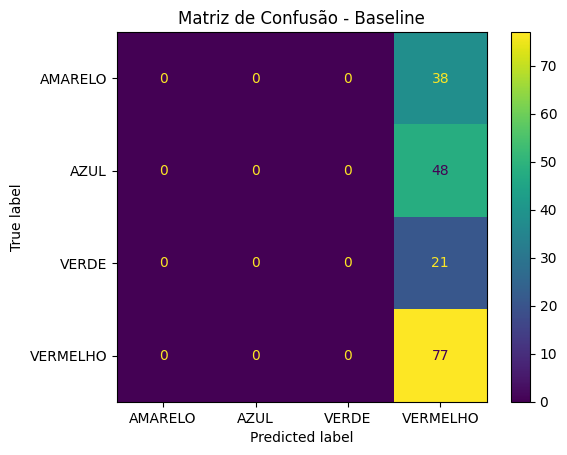

In [135]:

baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print("=== Baseline (classe mais frequente) ===")
print(classification_report(y_test, y_pred_base, zero_division=0))

ConfusionMatrixDisplay.from_estimator(baseline, X_test, y_test)
plt.title("Matriz de Confus√£o - Baseline")
plt.show()


## Modelos Reais


Ap√≥s o baseline, s√£o avaliados dois modelos de classifica√ß√£o:

- **Regress√£o Log√≠stica**: modelo linear, interpret√°vel, usado como baseline mais forte.  
- **Random Forest**: modelo ensemble baseado em m√∫ltiplas √°rvores de decis√£o, mais robusto para capturar rela√ß√µes complexas entre vari√°veis.

A compara√ß√£o entre esses modelos mostra o ganho de performance quando se aplica algoritmos mais sofisticados.



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Regress√£o Log√≠stica ===
              precision    recall  f1-score   support

     AMARELO       0.33      0.05      0.09        38
        AZUL       0.78      0.90      0.83        48
       VERDE       0.00      0.00      0.00        21
    VERMELHO       0.62      0.96      0.75        77

    accuracy                           0.65       184
   macro avg       0.43      0.48      0.42       184
weighted avg       0.53      0.65      0.55       184



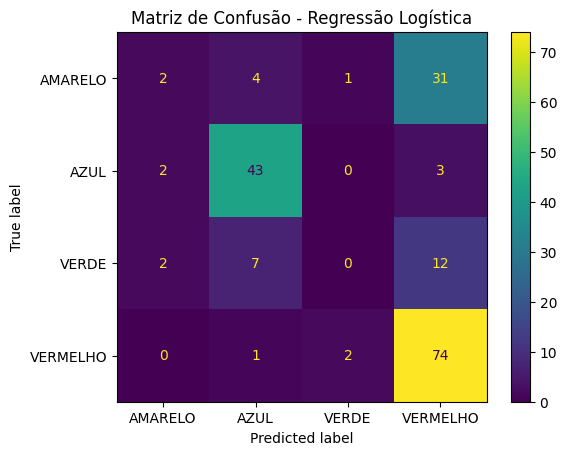

=== Random Forest ===
              precision    recall  f1-score   support

     AMARELO       0.78      0.74      0.76        38
        AZUL       0.94      0.94      0.94        48
       VERDE       0.68      0.71      0.70        21
    VERMELHO       0.91      0.92      0.92        77

    accuracy                           0.86       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.86      0.86      0.86       184



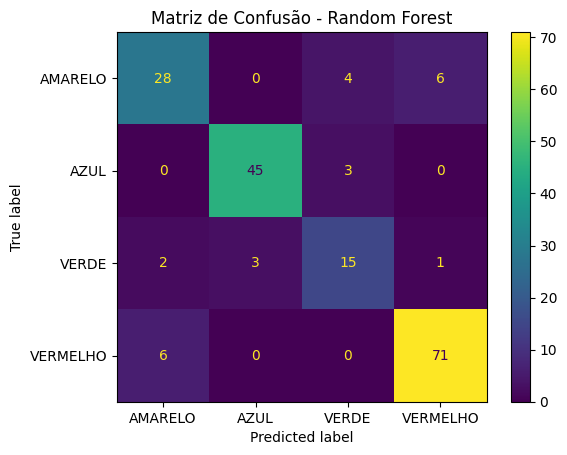

In [136]:


# Regress√£o Log√≠stica
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Regress√£o Log√≠stica ===")
print(classification_report(y_test, y_pred_log, zero_division=0))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Matriz de Confus√£o - Regress√£o Log√≠stica")
plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Matriz de Confus√£o - Random Forest")
plt.show()


## Compara√ß√£o dos Modelos

Aqui s√£o comparados os desempenhos do `Baseline`, `Regress√£o Log√≠stica` e `Random Forest`. A an√°lise considera m√©tricas de ***Accuracy***, ***F1 Macro*** e ***F1 Weighted***.


In [137]:

resultados = []

def avalia(nome, y_pred):
    f1m = f1_score(y_test, y_pred, average="macro")
    f1w = f1_score(y_test, y_pred, average="weighted")
    acc = accuracy_score(y_test, y_pred)
    resultados.append({"modelo": nome, "accuracy": acc, "f1_macro": f1m, "f1_weighted": f1w})

avalia("Baseline", y_pred_base)
avalia("LogReg", y_pred_log)
avalia("RandomForest", y_pred_rf)

print("\n=== Compara√ß√£o ===")
print(pd.DataFrame(resultados).sort_values("f1_macro", ascending=False))



=== Compara√ß√£o ===
         modelo  accuracy  f1_macro  f1_weighted
2  RandomForest      0.86      0.83         0.86
1        LogReg      0.65      0.42         0.55
0      Baseline      0.42      0.15         0.25


## Interpreta√ß√£o dos resultados

üîπ `Baseline`:

* Accuracy 42%, F1 Macro 0.15.
* Confirma que o dataset √© desbalanceado (classe majorit√°ria representa ~42%).
* Esse √© o ‚Äúpiso‚Äù para compara√ß√£o.

üîπ `Regress√£o Log√≠stica`:

* Accuracy 65%, mas F1 Macro apenas 0.42.
* Significa que o modelo melhora em rela√ß√£o ao baseline, mas ainda sofre para equilibrar classes minorit√°rias (VERDE, AMARELO).
* Indica que o dataset n√£o √© linearmente separ√°vel de forma simples.

üîπ `Random Forest`:

* Accuracy 86%, F1 Macro 0.83.
* Grande salto em rela√ß√£o ao baseline e √† LogReg.
* Mostra que o modelo consegue capturar rela√ß√µes mais complexas entre vari√°veis.
* Esse √© a melhor op√ß√£o.
* Esse resultado refor√ßa a import√¢ncia do uso de ensembles em problemas de classifica√ß√£o desbalanceados.

## Otimizacao de Hiperpar√¢metros


Nesta etapa, a **Random Forest** √© otimizada com `RandomizedSearchCV`, usando valida√ß√£o cruzada estratificada em 5 folds.

O objetivo √© encontrar a melhor combina√ß√£o de hiperpar√¢metros para **maximizar o F1 Macro**, garantindo maior equil√≠brio entre classes.

A valida√ß√£o cruzada aumenta a robustez do processo, reduzindo a depend√™ncia  
da divis√£o espec√≠fica entre treino e teste.



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores hiperpar√¢metros: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced'}
Melhor F1 macro (CV): 0.8479540211390395

=== Random Forest Otimizada ===
              precision    recall  f1-score   support

     AMARELO       0.85      0.89      0.87        38
        AZUL       0.94      0.92      0.93        48
       VERDE       0.73      0.76      0.74        21
    VERMELHO       0.99      0.96      0.97        77

    accuracy                           0.91       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.92      0.91      0.91       184



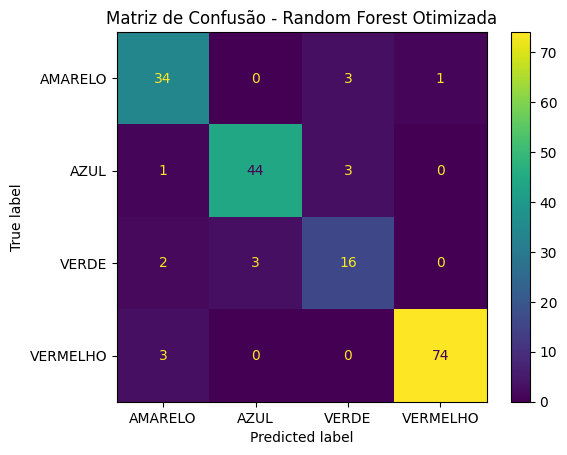

In [138]:

# Espa√ßo de busca de hiperpar√¢metros
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
}

# Modelo base
rf_base = RandomForestClassifier(random_state=42)

# Valida√ß√£o cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,            # n√∫mero de combina√ß√µes testadas (pode aumentar)
    cv=cv,
    scoring="f1_macro",   # m√©trica usada para otimiza√ß√£o
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Treina a busca aleat√≥ria
random_search.fit(X_train, y_train)

print("Melhores hiperpar√¢metros:", random_search.best_params_)
print("Melhor F1 macro (CV):", random_search.best_score_)

# Avalia no conjunto de teste
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n=== Random Forest Otimizada ===")
print(classification_report(y_test, y_pred_best_rf, zero_division=0))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Matriz de Confus√£o - Random Forest Otimizada")
plt.show()


üîπ Valida√ß√£o cruzada:

F1 Macro (CV) = 0.85 ‚Üí excelente, mostra que o desempenho √© est√°vel e n√£o depende s√≥ da divis√£o treino/teste.

üîπ Conjunto de teste:

* Accuracy = 91%.
* F1 Macro = 0.88 ‚Üí bem distribu√≠do entre as classes, indicando que o modelo n√£o est√° ‚Äúignorar‚Äù as minorit√°rias.
* Classes:
AMARELO ‚Üí 0.87 (bom equil√≠brio entre precis√£o e recall).
AZUL ‚Üí 0.93 (forte desempenho).
VERDE ‚Üí 0.74 (a mais dif√≠cil para o modelo, mas aceit√°vel).
VERMELHO ‚Üí 0.97 (quase perfeito).

O ponto fraco continua sendo a classe **VERDE**, mas j√° est√° bem melhor que no baseline e na LogReg.

## Observa√ß√µes e Corre√ß√µes Feitas:

Foi identificado e corrigido um vazamento de dados (`data leakage`) nos testes iniciais. O problema foi detectado por m√©tricas de performance irrealisticamente altas (pr√≥ximas a 100%) no modelo de baseline.

A causa era a presen√ßa de vari√°veis usadas para criar o target no conjunto de features. Foram removidas as seguintes colunas para solucionar o problema:
Colunas derivadas do target: `pontuacao`, `flag_crit*`, `media_anual_*`.
colunas de identifica√ß√£o: `Munic√≠pio`, `Codigo_Municipio`, `UF`.

Essa corre√ß√£o garantiu que o modelo aprenda apenas a partir de vari√°veis financeiras e demogr√°ficas, sem acesso a "atalhos" para a resposta.

## Gr√°fico SHARP

Este gr√°fico de barras mostra a import√¢ncia m√©dia de cada vari√°vel para as previs√µes do melhor modelo:

- Eixo Y (Vertical): Lista as 15 vari√°veis (features) mais importantes do eu modelo;

- Eixo X (Horizontal): Mostra a "Import√¢ncia m√©dia |SHAP value|". Quanto maior o valor (quanto maior a barra), mais "poder de influ√™ncia" aquela vari√°vel tem, em m√©dia, para levar o modelo a decidir entre as classes AZUL, VERDE, AMARELO ou VERMELHO.

O valor absoluto |SHAP value| significa que est√° sendo medido o tamanho do impacto, n√£o importando se ele empurra a previs√£o para uma classe "boa" ou "ruim".

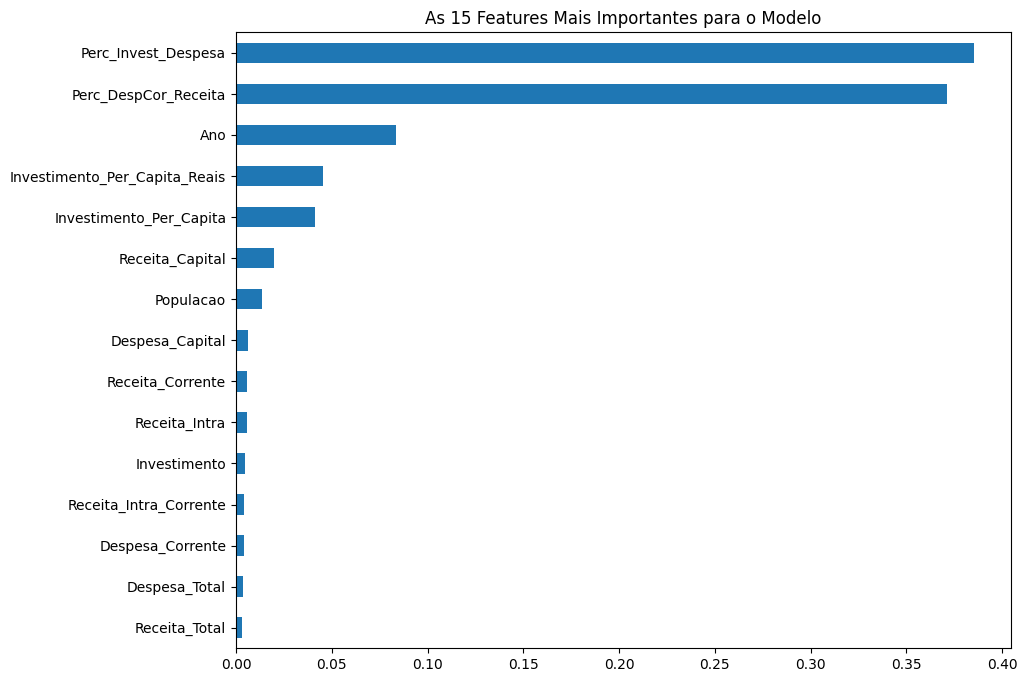

In [139]:
# Ap√≥s treinar o best_rf
importancias = pd.Series(best_rf.feature_importances_, index=features)
plt.figure(figsize=(10, 8))
importancias.nlargest(15).sort_values().plot(kind='barh')
plt.title("As 15 Features Mais Importantes para o Modelo")
plt.show()

An√°lise: As vari√°veis mais dominantes `Perc_Invest_Despesa (Percentual de Investimento sobre a Despesa Total)` e `Perc_DespCor_Receita (Percentual de Despesa Corrente sobre a Receita Total)` validam o trabalho porque foram exatamente as m√©tricas relativas criadas na engenharia de atributos. O modelo aprendeu e est√° confirmando que, para definir a sa√∫de fiscal de um munic√≠pio, o mais importante n√£o s√£o os valores brutos, mas sim as propor√ß√µes. Isso valida toda a l√≥gica de cria√ß√£o do `target`.

##Conclus√£o

* O experimento demonstrou ganhos progressivos no desempenho dos modelos de classifica√ß√£o.
O **baseline** `(DummyClassifier)` obteve **acur√°cia de 42%** e `F1 Macro` de **0.15**, refletindo apenas a propor√ß√£o da classe majorit√°ria.
A `Regress√£o Log√≠stica` atingiu 65% de acur√°cia e `F1 Macro` de 0.42, indicando melhora em rela√ß√£o ao baseline, mas d**ificuldade em lidar com classes minorit√°rias.**

* J√° a `Random Forest` simples obteve **86% de acur√°cia** e `F1 Macro` de **0.83**, mostrando superioridade clara. Por fim, a `Random Forest` otimizada via`RandomizedSearchCV` e `valida√ß√£o cruzada` alcan√ßou **91% de acur√°cia** e `F1 Macro` de **0.88**, com bom equil√≠brio entre as classes e robustez validada por `cross-validation`.
Isso evidencia que o modelo √© capaz de aprender padr√µes relevantes a partir de vari√°veis financeiras e demogr√°ficas, mesmo ap√≥s a exclus√£o de atributos derivados do target que poderiam causar vazamento de dados.

* O modelo final mostra que √© poss√≠vel prever n√≠veis municipais com boa acur√°cia a partir de dados financeiros e demogr√°ficos, refor√ßando a aplicabilidade de m√©todos de machine learning na an√°lise de finan√ßas p√∫blicas.

## Resposta as Hip√≥teses do Problema

Ap√≥s o desenvolvimento do trabalho segue as respostas percebidas ao final do MVP:

1.  O **`Investimento P√∫blico`** segue um padr√£o uniforme durante um determinado per√≠odo de tempo ou apresenta varia√ß√µes?

üîπ Descobriu-se que o investimento p√∫blico n√£o √© unfiforme ao longo do tempo. Apresenta per√≠odos de crescimento e outros de queda.

2. Avaliar se a maior **`Receita Total`** ou maior **`Despesa Total`** est√° associada a maior capacidade de **`Investimento`** per capta.

üîπA avalia√ß√£o mostrou que munic√≠pios que n√£o se destacam nesses quesitos em valores brutos apareceram no top do gr√°fico em valores per capita.

3. Munic√≠pios com maiores gastos brutos s√£o os que mais realizam investimentos em termos percentuais?

üîπMunic√≠pios que mais investem em termos brutos est√£o abaixo da m√©dia estadual de investimento em termos percentuais.

4. √â poss√≠vel `classificar` a `sa√∫de financeira` de um munic√≠pio com base em `indicadores demogr√°ficos` e `indicadores financeiros` relacionados ao `Investimento P√∫blico`?

üîπO uso de Machine Learning mostrou-se plenamente vi√°vel para fazer esse processo. Depois de ajustes e uso de melhores algoritmos os resultados foram animadores.



## Limita√ß√µes

Apesar dos avan√ßos, o MVP apresenta algumas limita√ß√µes:

* **Constru√ß√£o do target:** a vari√°vel resposta foi definida a partir de regras pr√©-estabelecidas. Isso limita a autonomia do modelo e pode restringir a descoberta de padr√µes alternativos.

* **Balanceamento de classes**: embora o uso de class_weight="balanced" tenha mitigado parcialmente o problema, ainda h√° desigualdade no desempenho entre classes (especialmente a classe VERDE).

* **Generaliza√ß√£o:** os dados se restringem a um per√≠odo e a um conjunto espec√≠fico de munic√≠pios. Portanto, a extrapola√ß√£o dos resultados para outros contextos deve ser feita com cautela.

* E**xplicabilidade:** a Random Forest fornece m√©tricas de import√¢ncia de vari√°veis, mas n√£o garante interpreta√ß√£o causal direta.

## Sugest√µes Futuras

* Aplicar t√©cnicas de balanceamento (ex.: SMOTE, undersampling).
* Testar outros algoritmos (Gradient Boosting, XGBoost, LightGBM).
* Revisitar a defini√ß√£o do target com base em indicadores externos.
* Expandir a base de dados para novos per√≠odos e vari√°veis socioecon√¥micas.
* Utilizar m√©todos de interpretabilidade avan√ßados (ex.: SHAP values).